In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import geopandas as gpd
import seaborn as sns

import os

# Set your desired working directory
os.chdir(r"C:/Users/Ariana Espiritu/Desktop/UP/A.Y. 2024-2025/2nd Sem/Econ 138 Python/Final Project")

# Creating the dataframes 

Let's create dataframes for all of our data throughout the different years and then check the number of columns in all of our datasets to see if they match.

In [12]:
# Creating the dataframes
for year in range(2003, 2020):
    globals()[f"df_{year}"] = pd.read_csv(f"SOF PUF {year}.csv")    # This creates a dataframe for each of our yearly datasets

# Checking the number of columns in some of the dataframes
print(len(df_2005.columns))
print(len(df_2010.columns))
print(len(df_2015.columns))
print(len(df_2020.columns))

31
42
48
45


We can see that the datasets have varying numbers of columns. However, we only want key information including:<br><br>
**Demographic Data:** _Age, Sex, Relationship to Household Head_<br>
**Geographic Data:** _Region, Country_ <br> 
**Education Data:** _Highest Education Level Attained_<br>
**Work Data:** _Reason for Moving Abroad_ <br>
**Remittances:** _Whether or not there are cash remittances, Total Cash  Remittances, Cash Amt Brought Home_<br>

This leaves a total of 11 major columns. Let's view the dataframes, filter out the unecessary columns, and rename them to keep the naming system consistent!

# Region Mapping

In [7]:
# Region Names 
REGN_code_to_name = {
    "1": "Region I (Ilocos Region)",
    "2": "Region II (Cagayan Valley)",
    "3": "Region III (Central Luzon)",
    "4": "Region IV-A (CALABARZON)",
    "5": "Region V (Bicol Region)",
    "6": "Region VI (Western Visayas)",
    "7": "Region VII (Central Visayas)",
    "8": "Region VIII (Eastern Visayas)",
    "9": "Region IX (Zamboanga Peninsula)",
    "01": "Region I (Ilocos Region)",
    "02": "Region II (Cagayan Valley)",
    "03": "Region III (Central Luzon)",
    "04": "Region IV-A (CALABARZON)",
    "05": "Region V (Bicol Region)",
    "06": "Region VI (Western Visayas)",
    "07": "Region VII (Central Visayas)",
    "08": "Region VIII (Eastern Visayas)",
    "09": "Region IX (Zamboanga Peninsula)",
    "10": "Region X (Northern Mindanao)",
    "11": "Region XI (Davao Region)",
    "12": "Region XII (SOCCSKSARGEN)",
    "13": "Region XIII (Caraga)",
    "14": "Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)",
    "15": "Cordillera Administrative Region (CAR)",
    "16": "National Capital Region (NCR)",
    "17": 'MIMAROPA Region',
    "19": "Autonomous Region in Muslim Mindanao (ARMM)",
    "41": "Region IV-A (CALABARZON)",
    "42": 'MIMAROPA Region',
    
}

# Country Mapping

In [29]:
# 2004-2010, 2014-2020 Mapping

CTRY_code_to_name_2004to2010_2014to2020 = {
    100: "AFRICA",
    211: "HONG KONG",
    212: "JAPAN",
    213: "TAIWAN",
    214: "OTHER COUNTRIES IN EAST ASIA",
    221: "MALAYSIA",
    222: "SINGAPORE",
    223: "OTHER COUNTRIES IN SE & SC ASIA",
    231: "KUWAIT",
    232: "QATAR",
    233: "SAUDI ARABIA",
    234: "UNITED ARAB EMIRATES",
    235: "OTHER COUNTRIES IN WESTERN ASIA",
    300: "AUSTRALIA",
    400: "EUROPE",
    500: "NORTH AND SOUTH AMERICA",
    600: "OTHER COUNTRIES"
}

In [28]:
# 2011-2013 Mapping
CTRY_code_to_name_2011to2013 = {
    1: "AUSTRALIA",
    2: "AFGHANISTAN",
    3: "ALBANIA",
    4: "ALGERIA",
    5: "ANGOLA",
    6: "ANTIGUA",
    7: "ARGENTINA",
    8: "ARUBA",
    9: "AUSTRIA",
    10: "BAHRAIN",
    11: "BANGLADESH",
    12: "BELGIUM",
    13: "BOLIVIA",
    14: "BRAZIL",
    15: "BRUNEI DARUSSALAM",
    16: "BULGARIA",
    17: "BURMA",
    18: "CANADA",
    19: "CAPE VERDE",
    20: "CHILE",
    21: "CHINA, PEOPLE'S REPUBLIC OF",
    22: "COLOMBIA",
    23: "COSTA RICA",
    24: "CUBA",
    25: "CZECHOSLOVAKIA",
    26: "DENMARK",
    27: "DOMINICAN REPUBLIC",
    28: "EGYPT",
    29: "EL SALVADOR",
    30: "FINLAND",
    31: "FIJI",
    32: "FRANCE",
    33: "GERMANY",
    34: "GHANA",
    35: "GREECE",
    36: "GUAM",
    37: "GUATEMALA",
    38: "HONDURAS",
    39: "HONGKONG",
    40: "HUNGARY",
    41: "ICELAND",
    42: "INDIA",
    43: "INDONESIA",
    44: "IRAN",
    45: "IRAQ",
    46: "ISRAEL",
    47: "ITALY",
    48: "KAMPUCHEA, DEMOCRATIC REPUBLIC (CAMBODIA)",
    49: "KENYA",
    50: "KOREA, SOUTH",
    51: "KUWAIT",
    52: "JAPAN",
    53: "JORDAN",
    54: "LEBANON",
    55: "LIBERIA",
    56: "LIBYAN ARAB JAMAHIRIYA",
    57: "MALAYSIA",
    58: "MARSHALL ISLANDS, REP OF",
    59: "MEXICO",
    60: "MONACO",
    61: "MOROCCO",
    62: "NEPAL",
    63: "NETHERLANDS",
    64: "NEW ZEALANDS (EXCLUDES WESTERN SAMOA)",
    65: "NIGERIA",
    66: "NORWAY",
    67: "OMAN",
    68: "PAKISTAN, ISLAMIC REP OF",
    69: "PALAU, REP OF",
    70: "PANAMA",
    71: "PAPUA NEW GUNEA",
    72: "PARAGUAY",
    73: "PERU",
    74: "POLAND",
    75: "PORTUGAL",
    76: "PORTUGUESE TIMOR AND DEPENDENCIES",
    77: "PUERTO RICO",
    78: "QATAR",
    79: "ROMANIA",
    80: "SAIPAN",
    81: "SAUDI ARABIA, KINGDOM OF",
    82: "SINGAPORE",
    83: "SPAIN",
    84: "SRI LANKA",
    85: "SUDAN",
    86: "SWEDEN",
    87: "SWITZERLAND",
    88: "SYRIAN ARAB REPUBLIC",
    89: "TAIWAN",
    90: "THAILAND",
    91: "TRUST TERRITORY OF PACIFIC ISLAND (EXCLUDING MARSHALL AND PALAU)",
    92: "TUNISIA",
    93: "UNION OF SOVIET SOCIALIST REPUBLIC",
    94: "UNITED ARAB EMIRATES",
    95: "UNITED KINGDOM (GREAT BRITAIN)",
    96: "UNITED STATES OF AMERICA",
    97: "URUGUAY",
    98: "VENEZUELA",
    99: "VIETNAM",
    100: "ZAIRE, REPUBLIC OF",
    101: "ZAMBIA",
    102: "ZIMBABWE",
    103: "CYPRUS",
    104: "IRELAND",
    888: "OTHER COUNTRIES",
    999: "COUNTRY NOT REPORTED"
}

# 1995-2020 Data

In [13]:
# Taking a first look at one of the datasets 
df_2003

W_REGN       W_PSU   W_HHID         SFILLER  SET1  SET2  SREL  SSEX  \
0          1  2802034000   170114  11211250001002     1     1     3     1   
1          1  2803020000   210022  13213310002002     1     1     3     2   
2          1  2806011000  1060206  11221040004202     1     1     3     1   
3          1  2808004000  1310061  11222050004402     1     1     3     2   
4          1  2809004000  1370089  14212310005502     1     1     3     2   
...      ...         ...      ...             ...   ...   ...   ...   ...   
2883      42  5318030000  6320595  14221160614002     1     1     6     2   
2884      42  5903013000   190006  14212080619002     1     1     3     1   
2885      42  5909022000  1060401  12211170621702     1     1     2     1   
2886      42  5913008000  1940016  13212120624502     1     1     6     1   
2887      42  5916004000  2710410  12221020625302     1     1     6     2   

      SAGE  TLEFT  ...   CASHAMT  MODE  RETAPSEP  CASHHOME  KINDREM   KINDAMT  \
0       26      2  ...       NaN   NaN         1   30000.0        2       NaN   
1       32      2  ...   45000.0   1.0         2       NaN        2       NaN   
2       23      1  ...    6000.0   1.0         2       NaN        1     400.0   
3       33      2  ...    9000.0   1.0         2       NaN        2       NaN   
4       29      1  ...   15000.0   1.0         2       NaN        2       NaN   
...    ...    ...  ...       ...   ...       ...       ...      ...       ...   
2883    23      1  ...       NaN   NaN         2       NaN        2       NaN   
2884    35      1  ...    8000.0   1.0         2       NaN        2       NaN   
2885    36      2  ...  180000.0   1.0         2       NaN        2       NaN   
2886    38      2  ...   16000.0   5.0         1  100000.0        2       NaN   
2887    27     99  ...  999999.0   9.0         9  999999.0        9  999999.0   

          SWGT  PRRCD  LFS_IND  P6M_IND  
0     378.0649    NaN        1      1.0  
1     380.4386    NaN        1      1.0  
2     353.3423    NaN        1      1.0  
3     381.8841    NaN        1      1.0  
4     380.7277    NaN        1      1.0  
...        ...    ...      ...      ...  
2883  250.8779    NaN        1      1.0  
2884  237.6450    NaN        1      1.0  
2885  238.4524    NaN        1      1.0  
2886  237.6450    NaN        1      1.0  
2887  262.8604    NaN        1      2.0  

[2888 rows x 37 columns]

In [14]:
# Filtering 2003 data
df_2003_filtered = df_2003[['SAGE','SSEX','SREL','W_REGN','CTRY','HGRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()
# Adding a year column
df_2003_filtered['YEAR']=2003

# Renaming the columns to match the standard
df_2003_filtered.rename(columns={'SAGE':'AGE','SSEX':'SEX','SREL':'REL','W_REGN':'REGN'}, inplace = True) 

# Renaming Regions using the Region Mapping
df_2003_filtered['REGN'] = df_2003_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2003_filtered['REGN'] = df_2003_filtered['REGN'].map(REGN_code_to_name)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2003_filtered = df_2003_filtered[df_2003_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing the data
df_2003_filtered

AGE  SEX  REL                      REGN  CTRY  HGRADE  REASON  CASHREM  \
0      26    1    3  Region I (Ilocos Region)    47     7.0       1        2   
1      32    2    3  Region I (Ilocos Region)    39     3.0       1        1   
3      33    2    3  Region I (Ilocos Region)    39     4.0       1        1   
4      29    2    3  Region I (Ilocos Region)    39     7.0       1        1   
5      31    1    4  Region I (Ilocos Region)    81     7.0       1        1   
...   ...  ...  ...                       ...   ...     ...     ...      ...   
2883   23    2    6           MIMAROPA Region    39     7.0       1        2   
2884   35    1    3           MIMAROPA Region    15     6.0       1        1   
2885   36    1    2           MIMAROPA Region    57     5.0       1        1   
2886   38    1    6           MIMAROPA Region    35     6.0       1        1   
2887   27    2    6           MIMAROPA Region   999     7.0       1        9   

       CASHAMT  CASHHOME  YEAR  
0          NaN   30000.0  2003  
1      45000.0       NaN  2003  
3       9000.0       NaN  2003  
4      15000.0       NaN  2003  
5     371000.0       NaN  2003  
...        ...       ...   ...  
2883       NaN       NaN  2003  
2884    8000.0       NaN  2003  
2885  180000.0       NaN  2003  
2886   16000.0  100000.0  2003  
2887  999999.0  999999.0  2003  

[2547 rows x 11 columns]

In [32]:
# Filtering 2004 data
df_2004_filtered = df_2004[['PQ4_AGE','PQ3_SEX','PQ2_REL','PREG','PQ11_CTRY','PQ8_HGRADE','PQ10_REASON',
                            'PQ19_CASHREM','PQ20_CASHAMT','PQ23_CASHHOME']].copy()
# Adding a year column
df_2004_filtered['YEAR']=2004

# Renaming the columns to match the standard
df_2004_filtered.rename(columns={'PQ4_AGE':'AGE','PQ3_SEX':'SEX','PQ2_REL':'REL','PREG':'REGN','PQ11_CTRY':'CTRY',
                                 'PQ8_HGRADE':'HGRADE','PQ10_REASON':'REASON','PQ19_CASHREM':'CASHREM',
                                 'PQ20_CASHAMT':'CASHAMT','PQ23_CASHHOME':'CASHHOME',}, inplace = True) 

# Renaming Regions using the Region Mapping
df_2004_filtered['REGN'] = df_2004_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2004_filtered['REGN'] = df_2004_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_2004_filtered['CTRY'] = df_2004_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2004_filtered = df_2004_filtered[df_2004_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing the data
df_2004_filtered

AGE  SEX  REL                      REGN  \
0      30    2    2  Region I (Ilocos Region)   
1      35    2    2  Region I (Ilocos Region)   
2      38    2    3  Region I (Ilocos Region)   
3      37    2    2  Region I (Ilocos Region)   
4      38    2    5  Region I (Ilocos Region)   
...   ...  ...  ...                       ...   
3519   20    2    3           MIMAROPA Region   
3520   36    2    2           MIMAROPA Region   
3521   28    2    3           MIMAROPA Region   
3522   42    1    1           MIMAROPA Region   
3523   52    2    2           MIMAROPA Region   

                                 CTRY  HGRADE  REASON  CASHREM CASHAMT  \
0                              TAIWAN       5       1        2           
1                              TAIWAN      65       1        1  005000   
2                           HONG KONG       4       1        1  003000   
3                           HONG KONG       4       1        1  008000   
4                        SAUDI ARABIA       5       1        1  030000   
...                               ...     ...     ...      ...     ...   
3519     OTHER COUNTRIES IN EAST ASIA       4       1        1  012000   
3520     OTHER COUNTRIES IN EAST ASIA       2       1        1  110000   
3521  OTHER COUNTRIES IN WESTERN ASIA       5       1        2           
3522                           EUROPE       4       1        1  180000   
3523                         MALAYSIA       4       1        2           

     CASHHOME  YEAR  
0              2004  
1              2004  
2              2004  
3      030000  2004  
4              2004  
...       ...   ...  
3519           2004  
3520   165000  2004  
3521   150000  2004  
3522           2004  
3523           2004  

[3182 rows x 11 columns]

In [33]:
# Filtering 2005 data
df_2005_filtered = df_2005[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q11_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q19_CASHREM','Q20_CASHAMT','Q23_CASHHOME']].copy()
# Adding a year column
df_2005_filtered['YEAR']=2005

# Renaming columns to match the standard
df_2005_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q11_CTRY':'CTRY',
                                 'Q11_CTRY':'CTRY','Q8_HGRADE':'HGRADE','Q10_REASON':'REASON','Q19_CASHREM':'CASHREM',
                                 'Q20_CASHAMT':'CASHAMT','Q23_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2005_filtered['REGN'] = df_2005_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2005_filtered['REGN'] = df_2005_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2005_filtered['CTRY'] = df_2005_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2005_filtered = df_2005_filtered[df_2005_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Show dataframe
df_2005_filtered

AGE  SEX  REL                      REGN  \
0      31    2    2  Region I (Ilocos Region)   
1      28    2    3  Region I (Ilocos Region)   
2      27    2    8  Region I (Ilocos Region)   
3      36    2    2  Region I (Ilocos Region)   
4      39    2    3  Region I (Ilocos Region)   
...   ...  ...  ...                       ...   
3647   38    2    2           MIMAROPA Region   
3648   33    2    3           MIMAROPA Region   
3649   25    2    3           MIMAROPA Region   
3650   37    2    2           MIMAROPA Region   
3651   27    1    5           MIMAROPA Region   

                                 CTRY  HGRADE  REASON  CASHREM CASHAMT  \
0                              TAIWAN       5       1        1  033000   
1                              TAIWAN      65       1        1  015000   
2                           SINGAPORE       5       1        1  007500   
3                              TAIWAN      65       1        1  040000   
4                           HONG KONG       1       1        1  025000   
...                               ...     ...     ...      ...     ...   
3647                        HONG KONG       5       1        1  015000   
3648                     SAUDI ARABIA      65       1        1  020000   
3649                           TAIWAN      63       1        2           
3650  OTHER COUNTRIES IN SE & SC ASIA       4       1        1  030000   
3651                           EUROPE      68       1        1  125000   

     CASHHOME  YEAR  
0      120000  2005  
1              2005  
2              2005  
3              2005  
4              2005  
...       ...   ...  
3647           2005  
3648           2005  
3649           2005  
3650           2005  
3651           2005  

[3260 rows x 11 columns]

In [35]:
# Filtering 2006 data
df_2006_filtered = df_2006[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q11_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q19_CASHREM','Q20_CASHAMT','Q23_CASHHOME']].copy()
# Adding a year column
df_2006_filtered['YEAR']=2006

# Renaming columns to match the standard
df_2006_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q11_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q10_REASON':'REASON','Q19_CASHREM':'CASHREM',
                                 'Q20_CASHAMT':'CASHAMT','Q23_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2006_filtered['REGN'] = df_2006_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2006_filtered['REGN'] = df_2006_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2006_filtered['CTRY'] = df_2006_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2006_filtered = df_2006_filtered[df_2006_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Show dataframe
df_2006_filtered

AGE  SEX  REL                      REGN  \
1      39    2    2  Region I (Ilocos Region)   
2      31    1    5  Region I (Ilocos Region)   
3      22    2    3  Region I (Ilocos Region)   
4      29    2    2  Region I (Ilocos Region)   
5      34    2    5  Region I (Ilocos Region)   
...   ...  ...  ...                       ...   
4211   36    1    1           MIMAROPA Region   
4212   26    2    3           MIMAROPA Region   
4213   51    1    1           MIMAROPA Region   
4215   28    1    5           MIMAROPA Region   
4216   41    2    7           MIMAROPA Region   

                                 CTRY  HGRADE  REASON  CASHREM CASHAMT  \
1                           HONG KONG       4       1        2           
2        OTHER COUNTRIES IN EAST ASIA       4       1        1  046000   
3                UNITED ARAB EMIRATES       5       1        2           
4     OTHER COUNTRIES IN WESTERN ASIA       4       1        2           
5                              EUROPE      61       3        1  180000   
...                               ...     ...     ...      ...     ...   
4211                         MALAYSIA       2       3        2           
4212                           TAIWAN      63       3        1  090000   
4213          NORTH AND SOUTH AMERICA       5       3        2           
4215                           EUROPE      68       1        1  900000   
4216  OTHER COUNTRIES IN SE & SC ASIA       5       1        1  024000   

     CASHHOME  YEAR  
1              2006  
2              2006  
3              2006  
4              2006  
5      250000  2006  
...       ...   ...  
4211           2006  
4212           2006  
4213           2006  
4215           2006  
4216           2006  

[3624 rows x 11 columns]

In [36]:
# Filtering 2007 data
df_2007_filtered = df_2007[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ19_CASHREM','RQ20_CASHAMT','RQ23_CASHHOME']].copy()
# Adding a year column
df_2007_filtered['YEAR']=2007

# Renaming columns to match the standard
df_2007_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ19_CASHREM':'CASHREM',
                                 'RQ20_CASHAMT':'CASHAMT','RQ23_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2007_filtered['REGN'] = df_2007_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2007_filtered['REGN'] = df_2007_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2007_filtered['CTRY'] = df_2007_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2007_filtered = df_2007_filtered[df_2007_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2007_filtered

AGE  SEX  REL                      REGN  \
0      36    2    3  Region I (Ilocos Region)   
3      40    2    2  Region I (Ilocos Region)   
4      40    2    2  Region I (Ilocos Region)   
5      32    1    5  Region I (Ilocos Region)   
7      23    2    3  Region I (Ilocos Region)   
...   ...  ...  ...                       ...   
4312   27    1    3           MIMAROPA Region   
4313   26    2    3           MIMAROPA Region   
4314   42    1    1           MIMAROPA Region   
4315   32    1    1           MIMAROPA Region   
4316   42    2    7           MIMAROPA Region   

                                 CTRY  HGRADE  REASON  CASHREM   CASHAMT  \
0                        SAUDI ARABIA     5.0       1        1   30000.0   
3                           HONG KONG     4.0       1        2       NaN   
4                           HONG KONG     4.0       1        2       NaN   
5        OTHER COUNTRIES IN EAST ASIA     4.0       1        1   36000.0   
7                UNITED ARAB EMIRATES     5.0       1        1   18000.0   
...                               ...     ...     ...      ...       ...   
4312             UNITED ARAB EMIRATES    65.0       1        1  210000.0   
4313                        HONG KONG     3.0       1        1   25000.0   
4314                           EUROPE    65.0       1        1   54000.0   
4315                           AFRICA    65.0       1        1   59400.0   
4316  OTHER COUNTRIES IN SE & SC ASIA     5.0       1        1   18000.0   

      CASHHOME  YEAR  
0          NaN  2007  
3          NaN  2007  
4          NaN  2007  
5          NaN  2007  
7          NaN  2007  
...        ...   ...  
4312       NaN  2007  
4313       NaN  2007  
4314       NaN  2007  
4315       NaN  2007  
4316       NaN  2007  

[3700 rows x 11 columns]

In [37]:
# Filtering 2008 data
df_2008_filtered = df_2008[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME']].copy()
# Adding a year column
df_2008_filtered['YEAR']=2008

# Renaming columns to match the standard
df_2008_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ19_CASHREM':'CASHREM',
                                 'RQ20_CASHAMT':'CASHAMT','RQ24_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming Regions using the Region Mapping
df_2008_filtered['REGN'] = df_2008_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2008_filtered['REGN'] = df_2008_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_2008_filtered['CTRY'] = df_2008_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)


# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2008_filtered = df_2008_filtered[df_2008_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2008_filtered

AGE  SEX  REL                      REGN                  CTRY  HGRADE  \
0      31    2    2  Region I (Ilocos Region)             HONG KONG       4   
1      27    2    5  Region I (Ilocos Region)                TAIWAN       4   
2      37    2    2  Region I (Ilocos Region)                TAIWAN       4   
3      37    2    3  Region I (Ilocos Region)             HONG KONG       4   
6      55    1    1  Region I (Ilocos Region)          SAUDI ARABIA       5   
...   ...  ...  ...                       ...                   ...     ...   
4921   41    2    5           MIMAROPA Region             HONG KONG       3   
4922   43    1    1           MIMAROPA Region             AUSTRALIA      68   
4923   35    2    2           MIMAROPA Region          SAUDI ARABIA      61   
4924   24    2    3           MIMAROPA Region  UNITED ARAB EMIRATES      67   
4925   19    2    3           MIMAROPA Region  UNITED ARAB EMIRATES      67   

      REASON  CASHREM  CASHAMT  CASHHOME  YEAR  
0          1        1  18500.0       NaN  2008  
1          1        1  10000.0       NaN  2008  
2          1        1   6000.0       NaN  2008  
3          1        1  48000.0       NaN  2008  
6          1        1  95000.0       NaN  2008  
...      ...      ...      ...       ...   ...  
4921       1        1   3000.0       NaN  2008  
4922       1        1  75000.0       NaN  2008  
4923       1        1  42000.0       NaN  2008  
4924       1        2      NaN       NaN  2008  
4925       1        2      NaN       NaN  2008  

[4204 rows x 11 columns]

In [38]:
# Filtering 2009 data
df_2009_filtered = df_2009[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME']].copy()
# Adding a year column
df_2009_filtered['YEAR']=2009

# Renaming columns to match the standard
df_2009_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ19_CASHREM':'CASHREM',
                                 'RQ20_CASHAMT':'CASHAMT','RQ24_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2009_filtered['REGN'] = df_2009_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2009_filtered['REGN'] = df_2009_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2009_filtered['CTRY'] = df_2009_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)


# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2009_filtered = df_2009_filtered[df_2009_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2009_filtered

AGE  SEX  REL                      REGN                          CTRY  \
0      32    2    2  Region I (Ilocos Region)                     HONG KONG   
2      44    2    1  Region I (Ilocos Region)          UNITED ARAB EMIRATES   
3      40    2    4  Region I (Ilocos Region)                     HONG KONG   
4      24    2    5  Region I (Ilocos Region)  OTHER COUNTRIES IN EAST ASIA   
5      38    2    2  Region I (Ilocos Region)                        TAIWAN   
...   ...  ...  ...                       ...                           ...   
5052   47    1    5           MIMAROPA Region       NORTH AND SOUTH AMERICA   
5053   26    1    3           MIMAROPA Region                        EUROPE   
5054   36    2    2           MIMAROPA Region       NORTH AND SOUTH AMERICA   
5055   25    2    3           MIMAROPA Region          UNITED ARAB EMIRATES   
5056   20    2    3           MIMAROPA Region          UNITED ARAB EMIRATES   

      HGRADE  REASON  CASHREM  CASHAMT CASHHOME  YEAR  
0          4       1        2                    2009  
2          4       1        1  0060000           2009  
3          4       1        1  0055000           2009  
4         65       1        1  0020000           2009  
5          4       1        1  0014000           2009  
...      ...     ...      ...      ...      ...   ...  
5052       5       1        1  0035000  0141000  2009  
5053      68       1        2           0035000  2009  
5054      61       1        1  0024000           2009  
5055      68       1        1  0070000           2009  
5056      68       1        1  0020000           2009  

[4430 rows x 11 columns]

In [39]:
# Filtering 2010 data
df_2010_filtered = df_2010[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME']].copy()
# Adding a year column
df_2010_filtered['YEAR']=2010

# Renaming columns to match the standard
df_2010_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ19_CASHREM':'CASHREM',
                                 'RQ20_CASHAMT':'CASHAMT','RQ24_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Mapping
df_2010_filtered['REGN'] = df_2010_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2010_filtered['REGN'] = df_2010_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2010_filtered['CTRY'] = df_2010_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2010_filtered = df_2010_filtered[df_2010_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2010_filtered

AGE  SEX  REL                      REGN  \
0      30    2    2  Region I (Ilocos Region)   
1      54    2    1  Region I (Ilocos Region)   
2      64    2    4  Region I (Ilocos Region)   
3      28    1    3  Region I (Ilocos Region)   
4      32    2    2  Region I (Ilocos Region)   
...   ...  ...  ...                       ...   
4839   22    1    3           MIMAROPA Region   
4840   30    2    3           MIMAROPA Region   
4841   39    2    3           MIMAROPA Region   
4842   48    1    5           MIMAROPA Region   
4843   47    2    2           MIMAROPA Region   

                                 CTRY  HGRADE  REASON  CASHREM  CASHAMT  \
0                           SINGAPORE       4       1        1  16000.0   
1                UNITED ARAB EMIRATES       5       1        1  12000.0   
2                           HONG KONG       2       1        1   2000.0   
3                              TAIWAN       5       1        2      NaN   
4                           HONG KONG      61       1        1   5000.0   
...                               ...     ...     ...      ...      ...   
4839             UNITED ARAB EMIRATES      68       1        2      NaN   
4840          NORTH AND SOUTH AMERICA      61       1        1   5000.0   
4841          NORTH AND SOUTH AMERICA      65       1        2      NaN   
4842          NORTH AND SOUTH AMERICA       5       1        1  45000.0   
4843  OTHER COUNTRIES IN WESTERN ASIA       4       1        1  24000.0   

      CASHHOME  YEAR  
0          NaN  2010  
1      25000.0  2010  
2      10000.0  2010  
3          NaN  2010  
4          NaN  2010  
...        ...   ...  
4839  100000.0  2010  
4840       NaN  2010  
4841   50000.0  2010  
4842  225000.0  2010  
4843       NaN  2010  

[4371 rows x 11 columns]

In [40]:
# Filtering 2011 data
df_2011_filtered = df_2011[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME']].copy()
# Adding a year column
df_2011_filtered['YEAR']=2011

# Renaming columns to match the standard
df_2011_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY','Q8_HGRADE':'HGRADE',
                                 'Q10_REASON':'REASON','Q21_CASHREM':'CASHREM','Q22_CASHAMT':'CASHAMT','Q26_CASHHOME':'CASHHOME'}, inplace = True)

# Renaming regions using the Region Mapping
df_2011_filtered['REGN'] = df_2011_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2011_filtered['REGN'] = df_2011_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2011_filtered['CTRY'] = df_2011_filtered['CTRY'].map(CTRY_code_to_name_2011to2013)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2011_filtered = df_2011_filtered[df_2011_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2011_filtered

AGE  SEX  REL                      REGN                      CTRY  \
0      38    2    2  Region I (Ilocos Region)      UNITED ARAB EMIRATES   
1      30    1    3  Region I (Ilocos Region)  SAUDI ARABIA, KINGDOM OF   
2      31    2    3  Region I (Ilocos Region)                  HONGKONG   
3      33    2    3  Region I (Ilocos Region)                 SINGAPORE   
4      30    2    3  Region I (Ilocos Region)                  HONGKONG   
...   ...  ...  ...                       ...                       ...   
4191   39    2    3           MIMAROPA Region                    KUWAIT   
4192   35    2    2           MIMAROPA Region                   LEBANON   
4193   29    2    3           MIMAROPA Region                    KUWAIT   
4194   32    2    3           MIMAROPA Region                    CYPRUS   
4195   59    1    1           MIMAROPA Region                     QATAR   

      HGRADE  REASON  CASHREM  CASHAMT  CASHHOME  YEAR  
0          5       1        2      NaN       NaN  2011  
1         65       1        1  80000.0  186000.0  2011  
2          5       1        1  13000.0       NaN  2011  
3          4       1        1  12000.0   15000.0  2011  
4          4       1        1   4000.0  100000.0  2011  
...      ...     ...      ...      ...       ...   ...  
4191       5       1        1  30000.0       NaN  2011  
4192      66       1        1  22000.0       NaN  2011  
4193      61       1        1  14000.0       NaN  2011  
4194       4       1        1  61000.0       NaN  2011  
4195       4       1        1  32000.0    4000.0  2011  

[4174 rows x 11 columns]

In [41]:
# Filtering 2012 data
df_2012_filtered = df_2012[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME']].copy()
# Adding a year column
df_2012_filtered['YEAR']=2012

# Renaming columns to match the standard
df_2012_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q10_REASON':'REASON','Q21_CASHREM':'CASHREM',
                                 'Q22_CASHAMT':'CASHAMT','Q26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2012_filtered['REGN'] = df_2012_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2012_filtered['REGN'] = df_2012_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2012_filtered['CTRY'] = df_2012_filtered['CTRY'].map(CTRY_code_to_name_2011to2013)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2012_filtered = df_2012_filtered[df_2012_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2012_filtered

AGE  SEX  REL                      REGN       CTRY  HGRADE  REASON  \
0      26    2    3  Region I (Ilocos Region)  SINGAPORE      67       1   
1      32    1    5  Region I (Ilocos Region)     CANADA      65       1   
2      39    1    1  Region I (Ilocos Region)  SINGAPORE      68       1   
3      26    2    3  Region I (Ilocos Region)     CANADA      67       1   
4      45    2    2  Region I (Ilocos Region)   HONGKONG       4       1   
...   ...  ...  ...                       ...        ...     ...     ...   
4286   30    2    3           MIMAROPA Region     KUWAIT      61       1   
4287   33    2    3           MIMAROPA Region     CYPRUS       4       1   
4288   24    2    3           MIMAROPA Region  SINGAPORE       4       1   
4289   39    1    5           MIMAROPA Region      JAPAN      65       1   
4290   25    1    3           MIMAROPA Region      ITALY       5       1   

      CASHREM   CASHAMT  CASHHOME  YEAR  
0           2       NaN       NaN  2012  
1           1   90000.0       NaN  2012  
2           1  138000.0       NaN  2012  
3           1  105000.0  100000.0  2012  
4           1   36000.0       NaN  2012  
...       ...       ...       ...   ...  
4286        1    8000.0       0.0  2012  
4287        1   45000.0       NaN  2012  
4288        1   28000.0       NaN  2012  
4289        1  120000.0  184000.0  2012  
4290        1   48000.0       NaN  2012  

[4278 rows x 11 columns]

In [42]:
# Filtering 2013 data
df_2013_filtered = df_2013[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME']].copy()
# Adding a year column
df_2013_filtered['YEAR']=2013

# Renaming columns to match the standard
df_2013_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q10_REASON':'REASON','Q21_CASHREM':'CASHREM',
                                 'Q22_CASHAMT':'CASHAMT','Q26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2013_filtered['REGN'] = df_2013_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2013_filtered['REGN'] = df_2013_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2013_filtered['CTRY'] = df_2013_filtered['CTRY'].map(CTRY_code_to_name_2011to2013)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2013_filtered = df_2013_filtered[df_2013_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2013_filtered

AGE  SEX  REL                      REGN                      CTRY  \
0      32    1    5  Region I (Ilocos Region)  SAUDI ARABIA, KINGDOM OF   
1      27    2    3  Region I (Ilocos Region)                 SINGAPORE   
2      33    1    5  Region I (Ilocos Region)                     ITALY   
3      31    1    5  Region I (Ilocos Region)                    KUWAIT   
4      40    1    1  Region I (Ilocos Region)                    FRANCE   
...   ...  ...  ...                       ...                       ...   
4363   55    2    2           MIMAROPA Region                  HONGKONG   
4364   30    2    5           MIMAROPA Region                  HONGKONG   
4365   26    2    3           MIMAROPA Region      UNITED ARAB EMIRATES   
4366   37    1    2           MIMAROPA Region                     JAPAN   
4367   40    1    5           MIMAROPA Region                     JAPAN   

      HGRADE  REASON  CASHREM   CASHAMT  CASHHOME  YEAR  
0         65       1        1  180000.0       NaN  2013  
1         67       1        1   30000.0  100000.0  2013  
2         65       1        1  120000.0       NaN  2013  
3          6       1        1   30000.0       NaN  2013  
4         68       1        1  138000.0       NaN  2013  
...      ...     ...      ...       ...       ...   ...  
4363       2       1        1   60000.0   40000.0  2013  
4364       3       1        1   36000.0       NaN  2013  
4365      68       1        2       NaN   30000.0  2013  
4366      65       1        1   90000.0       NaN  2013  
4367      65       1        1  240000.0       NaN  2013  

[4352 rows x 11 columns]

In [43]:
# Filtering 2014 data
df_2014_filtered = df_2014[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME']].copy()
# Adding a year column
df_2014_filtered['YEAR']=2014

# Renaming columns to match the standard
df_2014_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ21_CASHREM':'CASHREM',
                                 'RQ22_CASHAMT':'CASHAMT','RQ26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2014_filtered['REGN'] = df_2014_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2014_filtered['REGN'] = df_2014_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2014_filtered['CTRY'] = df_2014_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2014_filtered = df_2014_filtered[df_2014_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2014_filtered

AGE  SEX  REL                      REGN  \
0      31    1    3  Region I (Ilocos Region)   
1      43    2    2  Region I (Ilocos Region)   
2      26    1    3  Region I (Ilocos Region)   
3      33    2    2  Region I (Ilocos Region)   
4      38    1    5  Region I (Ilocos Region)   
...   ...  ...  ...                       ...   
5352   26    1    3           MIMAROPA Region   
5353   33    1    3           MIMAROPA Region   
5354   29    1    3           MIMAROPA Region   
5355   27    2    3           MIMAROPA Region   
5356   38    1    2           MIMAROPA Region   

                                 CTRY  HGRADE  REASON  CASHREM  CASHAMT  \
0                              TAIWAN    67.0       1        1  60000.0   
1                        SAUDI ARABIA    67.0       1        1  25000.0   
2                        SAUDI ARABIA     4.0       1        2      NaN   
3     OTHER COUNTRIES IN WESTERN ASIA     4.0       1        1   8000.0   
4                              EUROPE    68.0       1        1  80500.0   
...                               ...     ...     ...      ...      ...   
5352                           TAIWAN    64.0       1        1  15000.0   
5353                           AFRICA     6.0       1        1  22000.0   
5354                     SAUDI ARABIA    65.0       1        1  20000.0   
5355                        SINGAPORE    63.0       1        1  96000.0   
5356                        SINGAPORE    65.0       1        1  90000.0   

      CASHHOME  YEAR  
0          NaN  2014  
1          NaN  2014  
2          NaN  2014  
3          NaN  2014  
4          NaN  2014  
...        ...   ...  
5352       NaN  2014  
5353       NaN  2014  
5354   50000.0  2014  
5355       0.0  2014  
5356  100000.0  2014  

[4824 rows x 11 columns]

In [44]:
# Filtering 2015 data
df_2015_filtered = df_2015[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME']].copy()
# Adding a year column
df_2015_filtered['YEAR']=2015

# Renaming columns to match the standard
df_2015_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ21_CASHREM':'CASHREM',
                                 'RQ22_CASHAMT':'CASHAMT','RQ26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2015_filtered['REGN'] = df_2015_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2015_filtered['REGN'] = df_2015_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2015_filtered['CTRY'] = df_2015_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2015_filtered = df_2015_filtered[df_2015_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2015_filtered

AGE  SEX  REL                      REGN                          CTRY  \
1      29    1    3  Region I (Ilocos Region)                        TAIWAN   
2      25    2    3  Region I (Ilocos Region)                  SAUDI ARABIA   
3      30    1    3  Region I (Ilocos Region)          UNITED ARAB EMIRATES   
4      35    1    3  Region I (Ilocos Region)  OTHER COUNTRIES IN EAST ASIA   
5      25    1    5  Region I (Ilocos Region)                      MALAYSIA   
...   ...  ...  ...                       ...                           ...   
5435   27    1    3           MIMAROPA Region                        TAIWAN   
5436   26    2    2           MIMAROPA Region          UNITED ARAB EMIRATES   
5437   34    1    3           MIMAROPA Region               OTHER COUNTRIES   
5438   30    1    3           MIMAROPA Region                  SAUDI ARABIA   
5439   34    2    3           MIMAROPA Region                  SAUDI ARABIA   

      HGRADE  REASON  CASHREM  CASHAMT  CASHHOME  YEAR  
1         67       1        1  15000.0   50000.0  2015  
2         67       1        2      NaN   60000.0  2015  
3         68       1        1  48000.0       NaN  2015  
4          4       2        2      NaN       NaN  2015  
5         67       1        1  48000.0       NaN  2015  
...      ...     ...      ...      ...       ...   ...  
5435      64       1        1  50000.0       NaN  2015  
5436       4       1        2      NaN       NaN  2015  
5437       6       1        1  44000.0       NaN  2015  
5438      65       1        1  25000.0       NaN  2015  
5439      67       1        1  60000.0   80000.0  2015  

[5012 rows x 11 columns]

In [45]:
# Filtering 2016 data
df_2016_filtered = df_2016[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME']].copy()
# Adding a year column
df_2016_filtered['YEAR']=2016

# Renaming columns to match the standard
df_2016_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ21_CASHREM':'CASHREM',
                                 'RQ22_CASHAMT':'CASHAMT','RQ26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2016_filtered['REGN'] = df_2016_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2016_filtered['REGN'] = df_2016_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2016_filtered['CTRY'] = df_2016_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2016_filtered = df_2016_filtered[df_2016_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2016_filtered

AGE  SEX  REL                      REGN                     CTRY  \
0      34    2    2  Region I (Ilocos Region)                SINGAPORE   
1      48    1    1  Region I (Ilocos Region)             SAUDI ARABIA   
2      44    2    2  Region I (Ilocos Region)             SAUDI ARABIA   
3      26    2    3  Region I (Ilocos Region)             SAUDI ARABIA   
4      31    1    3  Region I (Ilocos Region)     UNITED ARAB EMIRATES   
...   ...  ...  ...                       ...                      ...   
4217   47    1    1                       NaN                    JAPAN   
4218   26    2    3                       NaN                   KUWAIT   
4219   26    2    3                       NaN  NORTH AND SOUTH AMERICA   
4220   61    1    2                       NaN  NORTH AND SOUTH AMERICA   
4221   36    1    3                       NaN                   TAIWAN   

      HGRADE  REASON  CASHREM   CASHAMT  CASHHOME  YEAR  
0        4.0       1        2       NaN       NaN  2016  
1        4.0       1        1   58800.0       NaN  2016  
2        4.0       1        1   40000.0       NaN  2016  
3       67.0       1        1   70000.0       NaN  2016  
4       65.0       1        1   55000.0  150000.0  2016  
...      ...     ...      ...       ...       ...   ...  
4217    65.0       1        1  105000.0       NaN  2016  
4218     6.0       1        1   24000.0       NaN  2016  
4219     4.0       1        1   36000.0       NaN  2016  
4220    63.0       2        1  125000.0    5000.0  2016  
4221    55.0       2        1   60000.0       NaN  2016  

[3855 rows x 11 columns]

In [46]:
# Filtering 2017 data
df_2017_filtered = df_2017[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME']].copy()
# Adding a year column
df_2017_filtered['YEAR']=2017

# Renaming columns to match the standard
df_2017_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ21_CASHREM':'CASHREM',
                                 'RQ22_CASHAMT':'CASHAMT','RQ26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2017_filtered['REGN'] = df_2017_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2017_filtered['REGN'] = df_2017_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2017_filtered['CTRY'] = df_2017_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2017_filtered = df_2017_filtered[df_2017_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2017_filtered

AGE  SEX  REL                                               REGN  \
0      41    2    2  Bangsamoro Autonomous Region in Muslim Mindana...   
1      36    2    2  Bangsamoro Autonomous Region in Muslim Mindana...   
2      43    2    2  Bangsamoro Autonomous Region in Muslim Mindana...   
3      27    2    2  Bangsamoro Autonomous Region in Muslim Mindana...   
4      39    2    2  Bangsamoro Autonomous Region in Muslim Mindana...   
...   ...  ...  ...                                                ...   
4131   51    2    2                          Region XII (SOCCSKSARGEN)   
4132   34    2    3                          Region XII (SOCCSKSARGEN)   
4133   38    1    1                          Region XII (SOCCSKSARGEN)   
4134   26    2    3                          Region XII (SOCCSKSARGEN)   
4135   23    2    3                          Region XII (SOCCSKSARGEN)   

              CTRY HGRADE  REASON  CASHREM  CASHAMT CASHHOME  YEAR  
0     SAUDI ARABIA    003       1        1  0046000           2017  
1           KUWAIT    008       1        1  0020000           2017  
2           KUWAIT    862       1        1  0052000           2017  
3        HONG KONG    634       1        1  0060000           2017  
4     SAUDI ARABIA    004       1        1  0021000           2017  
...            ...    ...     ...      ...      ...      ...   ...  
4131        KUWAIT    008       1        1  0028000           2017  
4132  SAUDI ARABIA    814       1        2                    2017  
4133  SAUDI ARABIA    004       1        1  0036000           2017  
4134        KUWAIT    003       1        2                    2017  
4135  SAUDI ARABIA    004       1        1  0025000           2017  

[3772 rows x 11 columns]

In [47]:
# Filtering 2018 data
df_2018_filtered = df_2018[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_NCOUNTRY','RQ8_HGC','RQ10_REASON',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME']].copy()
# Adding a year column
df_2018_filtered['YEAR']=2018

# Renaming columns to match the standard
df_2018_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_NCOUNTRY':'CTRY',
                                 'RQ8_HGC':'HGRADE','RQ10_REASON':'REASON','RQ23_CASHREM':'CASHREM',
                                 'RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2018_filtered['REGN'] = df_2018_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2018_filtered['REGN'] = df_2018_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2018_filtered['CTRY'] = df_2018_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2018_filtered = df_2018_filtered[df_2018_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2018_filtered

AGE  SEX  REL                                               REGN  \
0      31    2    2  Bangsamoro Autonomous Region in Muslim Mindana...   
1      33    2    4  Bangsamoro Autonomous Region in Muslim Mindana...   
2      41    1    1  Bangsamoro Autonomous Region in Muslim Mindana...   
3      37    2    4  Bangsamoro Autonomous Region in Muslim Mindana...   
4      29    2    4  Bangsamoro Autonomous Region in Muslim Mindana...   
...   ...  ...  ...                                                ...   
4209   27    1    3                          Region XII (SOCCSKSARGEN)   
4210   35    2    8                          Region XII (SOCCSKSARGEN)   
4211   26    2    4                          Region XII (SOCCSKSARGEN)   
4212   38    2    8                          Region XII (SOCCSKSARGEN)   
4213   49    1    1                          Region XII (SOCCSKSARGEN)   

                                 CTRY  HGRADE  REASON  CASHREM  CASHAMT  \
0                           HONG KONG       4       1        1    25000   
1                UNITED ARAB EMIRATES       7       1        1    34000   
2                           AUSTRALIA       7       1        1   180000   
3     OTHER COUNTRIES IN WESTERN ASIA       6       1        1    50000   
4                        SAUDI ARABIA       3       1        1   200000   
...                               ...     ...     ...      ...      ...   
4209                     SAUDI ARABIA       7       1        1    32000   
4210                     SAUDI ARABIA       3       1        1    10000   
4211                     SAUDI ARABIA       4       1        1    40000   
4212                            QATAR       2       1        2            
4213                     SAUDI ARABIA       3       1        2            

     CASHHOME  YEAR  
0              2018  
1              2018  
2              2018  
3              2018  
4              2018  
...       ...   ...  
4209           2018  
4210           2018  
4211           2018  
4212  0070000  2018  
4213           2018  

[3796 rows x 11 columns]

In [48]:
# Filtering 2019 data
df_2019_filtered = df_2019[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_NCOUNTRY','RQ8_HGC','RQ10_REASON',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME']].copy()
# Adding a year column
df_2019_filtered['YEAR']=2019

# Renaming columns to match the standard
df_2019_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_NCOUNTRY':'CTRY',
                                 'RQ8_HGC':'HGRADE','RQ10_REASON':'REASON','RQ23_CASHREM':'CASHREM',
                                 'RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME'}, inplace = True)

# Renaming regions using the Region Dictionary
df_2019_filtered['REGN'] = df_2019_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2019_filtered['REGN'] = df_2019_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2019_filtered['CTRY'] = df_2019_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2019_filtered = df_2019_filtered[df_2019_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2019_filtered

AGE  SEX  REL                                               REGN  \
0      28    1    3  Bangsamoro Autonomous Region in Muslim Mindana...   
1      46    1    1  Bangsamoro Autonomous Region in Muslim Mindana...   
2      56    2    2  Bangsamoro Autonomous Region in Muslim Mindana...   
3      40    2    2  Bangsamoro Autonomous Region in Muslim Mindana...   
4      54    1    1  Bangsamoro Autonomous Region in Muslim Mindana...   
...   ...  ...  ...                                                ...   
4185   32    2    2                          Region XII (SOCCSKSARGEN)   
4186   30    1    3                          Region XII (SOCCSKSARGEN)   
4187   22    2    4                          Region XII (SOCCSKSARGEN)   
4188   25    2    4                          Region XII (SOCCSKSARGEN)   
4189   38    2    2                          Region XII (SOCCSKSARGEN)   

                         CTRY HGRADE  REASON  CASHREM  CASHAMT CASHHOME  YEAR  
0                       JAPAN     04       1        1    60000           2019  
1                      EUROPE     09       1        1   200000           2019  
2                      KUWAIT     04       1        1    48000           2019  
3                   SINGAPORE     08       1        1    47000           2019  
4     NORTH AND SOUTH AMERICA     04       1        1   240000           2019  
...                       ...    ...     ...      ...      ...      ...   ...  
4185     UNITED ARAB EMIRATES     10       1        1    67000           2019  
4186             SAUDI ARABIA     10       1        1    23000           2019  
4187             SAUDI ARABIA     04       1        1    25000           2019  
4188             SAUDI ARABIA     02       1        1    45000           2019  
4189             SAUDI ARABIA     02       1        1    51000           2019  

[3588 rows x 11 columns]

In [49]:
# Filtering 2020 data
df_2020_filtered = df_2020[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME']].copy()
# Adding a year column
df_2020_filtered['YEAR']=2020

# Renaming columns to match the standard
df_2020_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN',
                                 'RQ12_CTRY':'CTRY','RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON',
                                 'RQ23_CASHREM':'CASHREM','RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Mapping
df_2020_filtered['REGN'] = df_2020_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2020_filtered['REGN'] = df_2020_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2020_filtered['CTRY'] = df_2020_filtered['CTRY'].map(CTRY_code_to_name_2004to2010_2014to2020)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2020_filtered = df_2020_filtered[df_2020_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2020_filtered

AGE  SEX  REL                      REGN          CTRY HGRADE  REASON  \
0      54    1    4  Region I (Ilocos Region)        EUROPE     04       1   
1      54    2    8  Region I (Ilocos Region)        EUROPE     09       1   
2      35    2    8  Region I (Ilocos Region)        EUROPE     09       1   
3      33    2    8  Region I (Ilocos Region)        EUROPE     10       1   
4      28    2    3  Region I (Ilocos Region)        EUROPE     10       1   
...   ...  ...  ...                       ...           ...    ...     ...   
4354   26    1    3           MIMAROPA Region         JAPAN     10       2   
4355   28    2    3           MIMAROPA Region         QATAR     04       1   
4356   41    1    2           MIMAROPA Region     AUSTRALIA     08       2   
4358   34    2    3           MIMAROPA Region     SINGAPORE     04       1   
4360   28    1    3           MIMAROPA Region  SAUDI ARABIA     10       1   

     CASHREM   CASHAMT CASHHOME  YEAR  
0          1     60000           2020  
1          1     40000           2020  
2          1     20000           2020  
3          1     40000           2020  
4          1    130000           2020  
...      ...       ...      ...   ...  
4354       1    120000           2020  
4355       1     21000           2020  
4356       1    210000           2020  
4358       1     15000           2020  
4360       1     50000  0200000  2020  

[3708 rows x 11 columns]

# Merging the data
Next, we can merge our dataframes to provide us with one major dataframe we can use for the rest of our analysis.

In [50]:
df_merged = pd.concat([df_2003_filtered, df_2004_filtered, df_2005_filtered, df_2006_filtered, df_2007_filtered, 
                       df_2008_filtered, df_2009_filtered, df_2010_filtered, df_2011_filtered, df_2012_filtered, 
                       df_2013_filtered, df_2014_filtered, df_2015_filtered, df_2016_filtered, df_2017_filtered, 
                       df_2018_filtered, df_2019_filtered, df_2020_filtered],
                       ignore_index=True)
df_merged

AGE  SEX  REL                      REGN          CTRY HGRADE  REASON  \
0       26    1    3  Region I (Ilocos Region)            47    7.0       1   
1       32    2    3  Region I (Ilocos Region)            39    3.0       1   
2       33    2    3  Region I (Ilocos Region)            39    4.0       1   
3       29    2    3  Region I (Ilocos Region)            39    7.0       1   
4       31    1    4  Region I (Ilocos Region)            81    7.0       1   
...    ...  ...  ...                       ...           ...    ...     ...   
70672   26    1    3           MIMAROPA Region         JAPAN     10       2   
70673   28    2    3           MIMAROPA Region         QATAR     04       1   
70674   41    1    2           MIMAROPA Region     AUSTRALIA     08       2   
70675   34    2    3           MIMAROPA Region     SINGAPORE     04       1   
70676   28    1    3           MIMAROPA Region  SAUDI ARABIA     10       1   

      CASHREM   CASHAMT CASHHOME  YEAR  
0           2       NaN  30000.0  2003  
1           1   45000.0      NaN  2003  
2           1    9000.0      NaN  2003  
3           1   15000.0      NaN  2003  
4           1  371000.0      NaN  2003  
...       ...       ...      ...   ...  
70672       1    120000           2020  
70673       1     21000           2020  
70674       1    210000           2020  
70675       1     15000           2020  
70676       1     50000  0200000  2020  

[70677 rows x 11 columns]

In [51]:
df_merged['REGN'].value_counts()

REGN
Region XIII (Caraga)                                       9171
Region IV-A (CALABARZON)                                   9009
Region III (Central Luzon)                                 7765
Region I (Ilocos Region)                                   6006
Region VI (Western Visayas)                                5465
Region II (Cagayan Valley)                                 5443
Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)    3835
Region VII (Central Visayas)                               3705
Region XII (SOCCSKSARGEN)                                  3473
Region X (Northern Mindanao)                               2461
Region XI (Davao Region)                                   2363
Region V (Bicol Region)                                    2322
Cordillera Administrative Region (CAR)                     2282
Region VIII (Eastern Visayas)                              1983
National Capital Region (NCR)                              1848
MIMAROPA Region                    

# Cleaning the data
Now, we can clean the merged dataframe.

In [52]:
# Checking for NaN values
print(f"NaN Values in AGE: {df_merged['AGE'].isna().sum()}")
print(f"NaN Values in SEX: {df_merged['SEX'].isna().sum()}")
print(f"NaN Values in REL: {df_merged['REL'].isna().sum()}")
print(f"NaN Values in REGN: {df_merged['REGN'].isna().sum()}")
print(f"NaN Values in CTRY: {df_merged['CTRY'].isna().sum()}")
print(f"NaN Values in HGRADE: {df_merged['HGRADE'].isna().sum()}")
print(f"NaN Values in REASON: {df_merged['REASON'].isna().sum()}")
print(f"NaN Values in CASHREM: {df_merged['CASHREM'].isna().sum()}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")
print(f"NaN Values in CASHHOME: {df_merged['CASHHOME'].isna().sum()}")


NaN Values in AGE: 0
NaN Values in SEX: 0
NaN Values in REL: 0
NaN Values in REGN: 113
NaN Values in CTRY: 185
NaN Values in HGRADE: 0
NaN Values in REASON: 0
NaN Values in CASHREM: 0
NaN Values in CASHAMT: 8540
NaN Values in CASHHOME: 33813


In [53]:
# To make the 1s, 2s, and 3s consistent format
df_merged['REASON'] =df_merged['REASON'].astype(str).str.strip()

# Merging 2 and 3 since they both mean the same thing in the different years
df_merged['REASON'] = df_merged['REASON'].replace('3', '2')

df_merged['REASON'].value_counts()

REASON
1    67757
2     2920
Name: count, dtype: int64

Dropping negligible values

In [54]:
# We can drop the 113 missing values for Region
df_merged = df_merged.dropna(subset=['REGN'])
print(f"NaN Values in REGN: {df_merged['REGN'].isna().sum()}")

# We can drop the 234 missing values for Country
df_merged = df_merged.dropna(subset=['CTRY'])
print(f"NaN Values in CTRY: {df_merged['CTRY'].isna().sum()}")

# We can drop the 2 missing values for Cash Remittances
df_merged = df_merged.dropna(subset=['CASHREM'])
print(f"NaN Values in CASHREM: {df_merged['CASHREM'].isna().sum()}")

df_merged

NaN Values in REGN: 0
NaN Values in CTRY: 0
NaN Values in CASHREM: 0


AGE  SEX  REL                      REGN          CTRY HGRADE REASON  \
0       26    1    3  Region I (Ilocos Region)            47    7.0      1   
1       32    2    3  Region I (Ilocos Region)            39    3.0      1   
2       33    2    3  Region I (Ilocos Region)            39    4.0      1   
3       29    2    3  Region I (Ilocos Region)            39    7.0      1   
4       31    1    4  Region I (Ilocos Region)            81    7.0      1   
...    ...  ...  ...                       ...           ...    ...    ...   
70672   26    1    3           MIMAROPA Region         JAPAN     10      2   
70673   28    2    3           MIMAROPA Region         QATAR     04      1   
70674   41    1    2           MIMAROPA Region     AUSTRALIA     08      2   
70675   34    2    3           MIMAROPA Region     SINGAPORE     04      1   
70676   28    1    3           MIMAROPA Region  SAUDI ARABIA     10      1   

      CASHREM   CASHAMT CASHHOME  YEAR  
0           2       NaN  30000.0  2003  
1           1   45000.0      NaN  2003  
2           1    9000.0      NaN  2003  
3           1   15000.0      NaN  2003  
4           1  371000.0      NaN  2003  
...       ...       ...      ...   ...  
70672       1    120000           2020  
70673       1     21000           2020  
70674       1    210000           2020  
70675       1     15000           2020  
70676       1     50000  0200000  2020  

[70379 rows x 11 columns]

In [55]:
# To know if the missing CASHAMT data is from those who answered 'no' when asked if they give cash remittances
NO_CASHREM = df_merged['CASHREM'].eq(2).sum()
EMPTY_CASHAMT = df_merged[df_merged['CASHREM'] == 2]['CASHAMT'].isna().sum()

print(f"People who said 'No' to cash remittances: {NO_CASHREM}")
print(f"Of them, how many have missing cash amount: {EMPTY_CASHAMT}")

People who said 'No' to cash remittances: 14629
Of them, how many have missing cash amount: 8483


In [56]:
# Checking to see if there is a specific year where 1 and 2 might mean different things
df_merged[df_merged['CASHAMT'].isna()]['YEAR'].value_counts()

YEAR
2014    1137
2015    1058
2010    1035
2008     997
2007     904
2016     780
2013     677
2012     673
2011     614
2003     609
Name: count, dtype: int64

There doesn't seem to be any abnormal years, so we can likely attribute it to answering error. This error has gone down through time as well. For our purposes, we will assume that those who answered "No" in cash remittances did not send any cash remittances to the Philippines.

In [57]:
# Making CASHAMT = 0 if they answered "No" to Cash Remittances
df_merged.loc[df_merged['CASHREM']==2,'CASHAMT']=0

# Double checking if there are any empty CASHAMT rows
print(f"Empty CASHAMT Rows: {EMPTY_CASHAMT}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")


Empty CASHAMT Rows: 8483
NaN Values in CASHAMT: 1


There are 11 more values with NaN amounts. These may come from those who answered "Yes" to CASHREM but didn't place any cash amount for their remittances.

In [58]:
df_merged[df_merged['CASHAMT'].isna()] ['YEAR'].value_counts()

YEAR
2003    1
Name: count, dtype: int64

It seems like the remaining NaN values indeed come from those who answered "Yes" to CASHREM but didn't place any cash amount for their remittances.  Let's remove those rows.

In [59]:
# Dropping the remaining NaN rows for CASHAMT
df_merged = df_merged.dropna(subset=['CASHAMT'])
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")
df_merged

NaN Values in CASHAMT: 0


AGE  SEX  REL                      REGN          CTRY HGRADE REASON  \
0       26    1    3  Region I (Ilocos Region)            47    7.0      1   
1       32    2    3  Region I (Ilocos Region)            39    3.0      1   
2       33    2    3  Region I (Ilocos Region)            39    4.0      1   
3       29    2    3  Region I (Ilocos Region)            39    7.0      1   
4       31    1    4  Region I (Ilocos Region)            81    7.0      1   
...    ...  ...  ...                       ...           ...    ...    ...   
70672   26    1    3           MIMAROPA Region         JAPAN     10      2   
70673   28    2    3           MIMAROPA Region         QATAR     04      1   
70674   41    1    2           MIMAROPA Region     AUSTRALIA     08      2   
70675   34    2    3           MIMAROPA Region     SINGAPORE     04      1   
70676   28    1    3           MIMAROPA Region  SAUDI ARABIA     10      1   

      CASHREM   CASHAMT CASHHOME  YEAR  
0           2         0  30000.0  2003  
1           1   45000.0      NaN  2003  
2           1    9000.0      NaN  2003  
3           1   15000.0      NaN  2003  
4           1  371000.0      NaN  2003  
...       ...       ...      ...   ...  
70672       1    120000           2020  
70673       1     21000           2020  
70674       1    210000           2020  
70675       1     15000           2020  
70676       1     50000  0200000  2020  

[70378 rows x 11 columns]

In [60]:
# Checking the number of NaN values again
print(f"NaN Values in AGE: {df_merged['AGE'].isna().sum()}")
print(f"NaN Values in SEX: {df_merged['SEX'].isna().sum()}")
print(f"NaN Values in REL: {df_merged['REL'].isna().sum()}")
print(f"NaN Values in REGN: {df_merged['REGN'].isna().sum()}")
print(f"NaN Values in CTRY: {df_merged['CTRY'].isna().sum()}")
print(f"NaN Values in HGRADE: {df_merged['HGRADE'].isna().sum()}")
print(f"NaN Values in CASHREM: {df_merged['CASHREM'].isna().sum()}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")

NaN Values in AGE: 0
NaN Values in SEX: 0
NaN Values in REL: 0
NaN Values in REGN: 0
NaN Values in CTRY: 0
NaN Values in HGRADE: 0
NaN Values in CASHREM: 0
NaN Values in CASHAMT: 0


In [61]:
df_merged.shape

(70378, 11)

We've removed a total of 360 out of 93,638 rows or 0.386% of the rows, bringing us to 93,278 rows in total :D

# Using the Shapefiles

In [102]:
# Reading the PH region shapefile
ph_gdf = gpd.read_file('PH_Adm1_Regions.shp.shx')

# Taking a look at the components of the shapefile
print(ph_gdf.columns)

print(ph_gdf.head())


DataSourceError: Unable to open PH_Adm1_Regions.shp.shp or PH_Adm1_Regions.shp.SHP in rb mode.

From here, we can see that the region name is under the 'adm1_en' column. We can rename that for readability.

In [101]:
# Renaming region column
ph_gdf = ph_gdf.rename(columns={"adm1_en": "REGN"})

# Checking if the region column has successfully been renamed:
print(ph_gdf.columns)

NameError: name 'ph_gdf' is not defined

In [63]:
print(ph_gdf['REGN'].unique())

NameError: name 'ph_gdf' is not defined

In [64]:
# Reading the Global shapefile
world = gpd.read_file('ne_10m_admin_0_countries.shp')

# Since the world shapefile has a lot of countries that are not in the OFW data (2004-2010, 2014-2020), we group the shapes by region and sum the OFW counts for each region.
area_to_countries = {
    'AFRICA': ['Nigeria', 'Kenya', 'Ghana', 'South Africa', 'Ethiopia', 'Morocco', 'Egypt', 'Algeria', 'Tunisia', 'Uganda'],
    'HONG KONG': ['Hong Kong S.A.R.'],
    'JAPAN': ['Japan'],
    'TAIWAN': ['Taiwan'],
    'OTHER COUNTRIES IN EAST ASIA': ['South Korea', 'North Korea', 'Mongolia', 'Macau S.A.R.'],
    'MALAYSIA': ['Malaysia'],
    'SINGAPORE': ['Singapore'],
    'OTHER COUNTRIES IN SE & SC ASIA': ['Indonesia', 'Vietnam', 'Thailand', 'Cambodia', 'Laos', 'Myanmar', 'Brunei', 'East Timor'],
    'KUWAIT': ['Kuwait'],
    'QATAR': ['Qatar'],
    'SAUDI ARABIA': ['Saudi Arabia'],
    'UNITED ARAB EMIRATES': ['United Arab Emirates'],
    'OTHER COUNTRIES IN WESTERN ASIA': ['Bahrain', 'Oman', 'Jordan', 'Iraq', 'Syria', 'Lebanon', 'Israel', 'Palestine'],
    'AUSTRALIA': ['Australia'],
    'EUROPE': ['United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands', 'Switzerland', 'Belgium', 'Poland', 'Austria'],
    'NORTH AND SOUTH AMERICA': ['United States of America', 'Canada', 'Brazil', 'Mexico', 'Argentina', 'Chile', 'Colombia', 'Peru'],
    'OTHER COUNTRIES': ['New Zealand', 'Russia', 'India', 'Pakistan', 'Bangladesh', 'Nepal', 'Sri Lanka', 'Fiji']
}

# Creating a new column in the world GeoDataFrame to categorize countries by area shown above
world['AREA'] = world['ADMIN'].apply(lambda x: next((area for area, countries in area_to_countries.items() if x in countries), 'Other Countries'))

# Taking a look at the components of the shapefile
print(world.columns)
print(world)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry', 'AREA'],
      dtype='object', length=170)
          featurecla  scalerank  LABELRANK                    SOVEREIGNT  \
0    Admin-0 country          0          2                     Indonesia   
1    Admin-0 country          0          3                      Malaysia   
2    Admin-0 country          0          2                         Chile   
3    Admin-0 country          0          3                       Bolivia   
4    Admin-0 country          0          2                          Peru   
..               ...        ...        ...                           ...   
253  Admin-0 country          0          4                         China   
254  Admin-0 country          6          5                     Australia   
255  Admi

# Making the Animated Choropleth

In [65]:
# Since there are no missing values, we can directly merge the shapefiles with the dataframe. Let's test it with the 1995 data.
region_counts_2020 = df_2020_filtered['REGN'].value_counts().reset_index() # Counts the number of OFWs per region and turns it into a dataframe

# Take a look at the dataframe
region_counts_2020

REGN  count
0                         Region VI (Western Visayas)    366
1                                Region XIII (Caraga)    354
2                          Region III (Central Luzon)    343
3                          Region II (Cagayan Valley)    275
4                            Region IV-A (CALABARZON)    264
5   Bangsamoro Autonomous Region in Muslim Mindana...    255
6                           Region XII (SOCCSKSARGEN)    251
7                            Region I (Ilocos Region)    247
8                        Region X (Northern Mindanao)    207
9                        Region VII (Central Visayas)    182
10                            Region V (Bicol Region)    171
11                      National Capital Region (NCR)    157
12                           Region XI (Davao Region)    152
13                                    MIMAROPA Region    132
14                      Region VIII (Eastern Visayas)    132
15             Cordillera Administrative Region (CAR)    111
16                    Region IX (Zamboanga Peninsula)    109

In [66]:
# Region counts per region
for year in range(1995, 2020):
    df = globals().get(f'df_{year}_filtered')
    if df is not None:
        region_counts = df['REGN'].value_counts().reset_index()
        region_counts.columns = ['REGN', 'count']
        globals()[f'region_counts_{year}'] = region_counts

# Merge shapefile with OFW counts per year
for year in range(1995, 2020):
    region_counts = globals().get(f'region_counts_{year}')
    if region_counts is None:
        print(f"region_counts_{year} not found.")
        continue

    df_heatmap = ph_gdf.merge(region_counts, on='REGN', how='left')
    globals()[f'df_heatmap_{year}'] = df_heatmap

region_counts_1995 not found.
region_counts_1996 not found.
region_counts_1997 not found.
region_counts_1998 not found.
region_counts_1999 not found.
region_counts_2000 not found.
region_counts_2001 not found.
region_counts_2002 not found.


NameError: name 'ph_gdf' is not defined

In [626]:
# Take a look at the dataframe
region_counts_2015

REGN  count
0                            Region IV-A (CALABARZON)    757
1                          Region III (Central Luzon)    568
2                                Region XIII (Caraga)    518
3                            Region I (Ilocos Region)    494
4                          Region II (Cagayan Valley)    454
5                         Region VI (Western Visayas)    350
6   Bangsamoro Autonomous Region in Muslim Mindana...    282
7                        Region VII (Central Visayas)    267
8                           Region XII (SOCCSKSARGEN)    235
9                            Region XI (Davao Region)    167
10                      Region VIII (Eastern Visayas)    159
11                            Region V (Bicol Region)    156
12                       Region X (Northern Mindanao)    150
13                      National Capital Region (NCR)    138
14             Cordillera Administrative Region (CAR)    123
15                    Region IX (Zamboanga Peninsula)    116
16                                    MIMAROPA Region     78

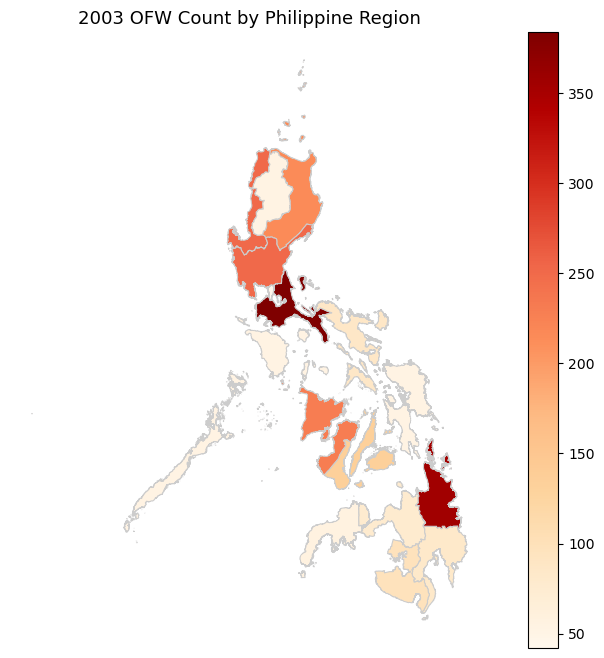

In [573]:
# Creating the chloropleth map for 2003
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2003.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2003 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2003.png", dpi=150)
plt.show()

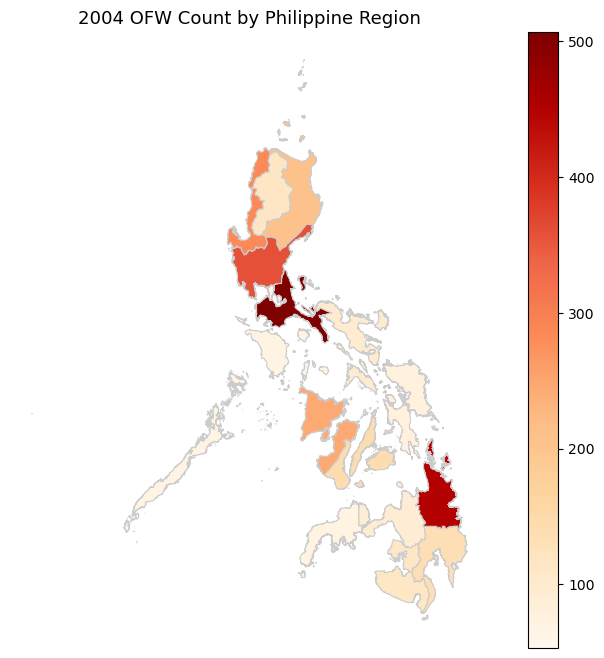

In [574]:
# Creating the chloropleth map for 2004
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2004.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2004 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2004.png", dpi=150)
plt.show()

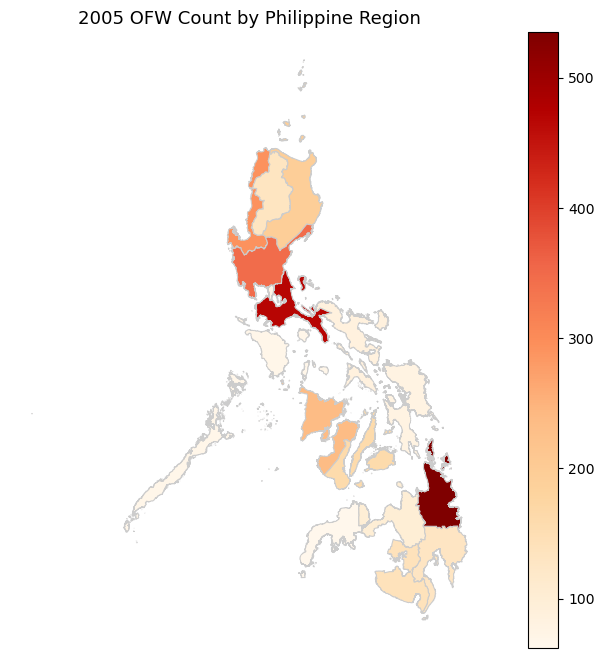

In [575]:
# Creating the chloropleth map for 2005
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2005.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2005 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2005.png", dpi=150)
plt.show()

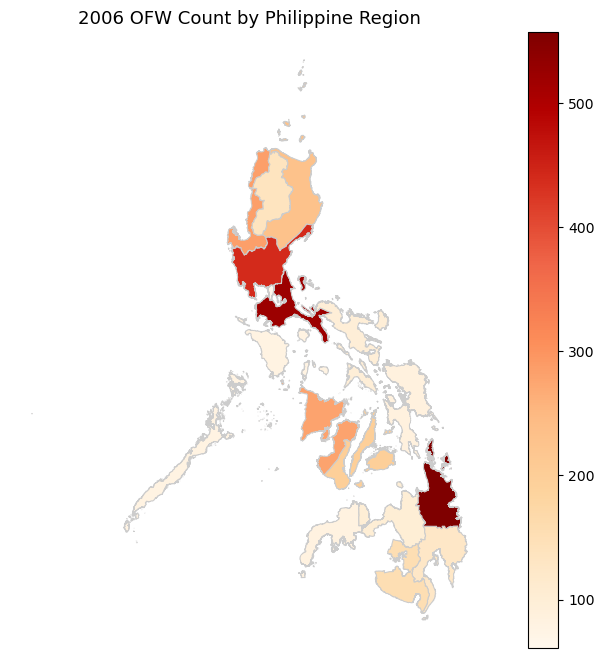

In [576]:
# Creating the chloropleth map for 2006
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2006.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2006 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2006.png", dpi=150)
plt.show()

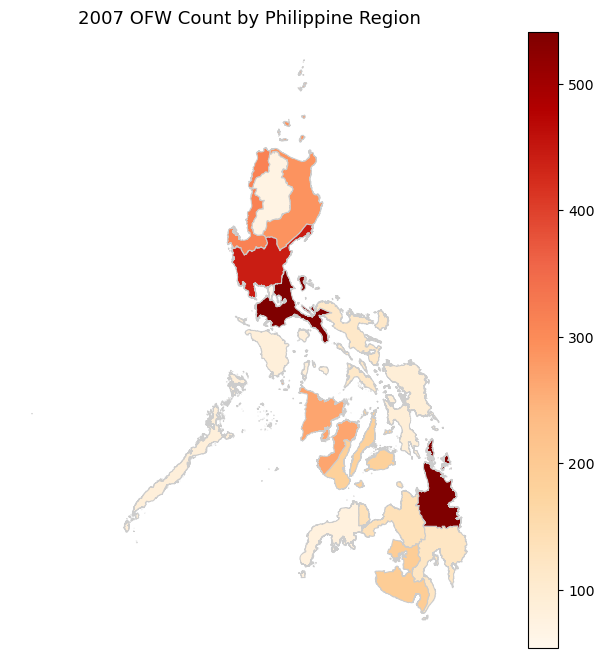

In [577]:
# Creating the chloropleth map for 2007
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2007.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2007 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2007.png", dpi=150)
plt.show()

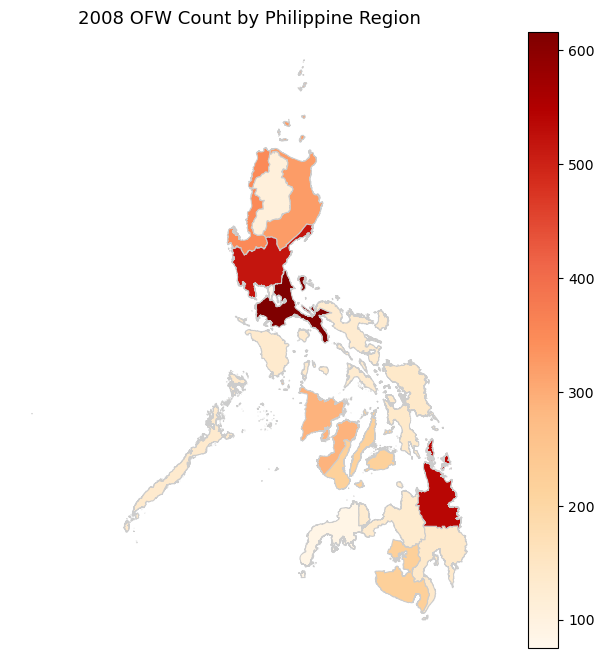

In [578]:
# Creating the chloropleth map for 2008
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2008.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2008 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2008.png", dpi=150)
plt.show()

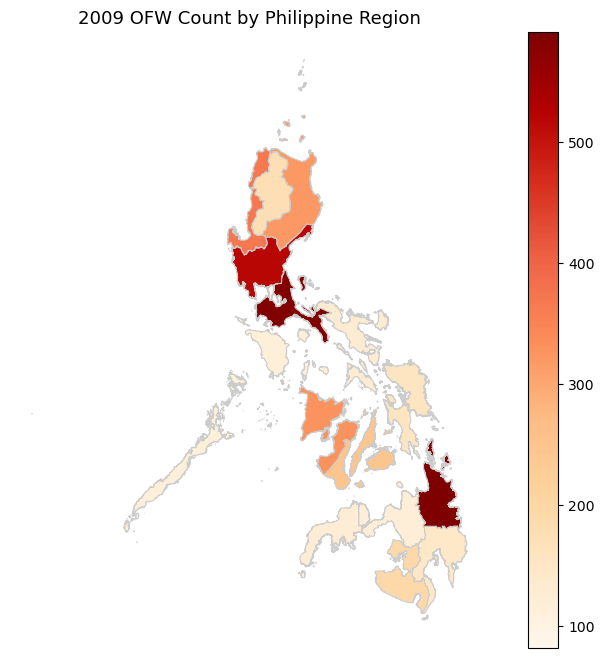

In [579]:
# Creating the chloropleth map for 2009
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2009.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2009 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2009.png", dpi=150)
plt.show()

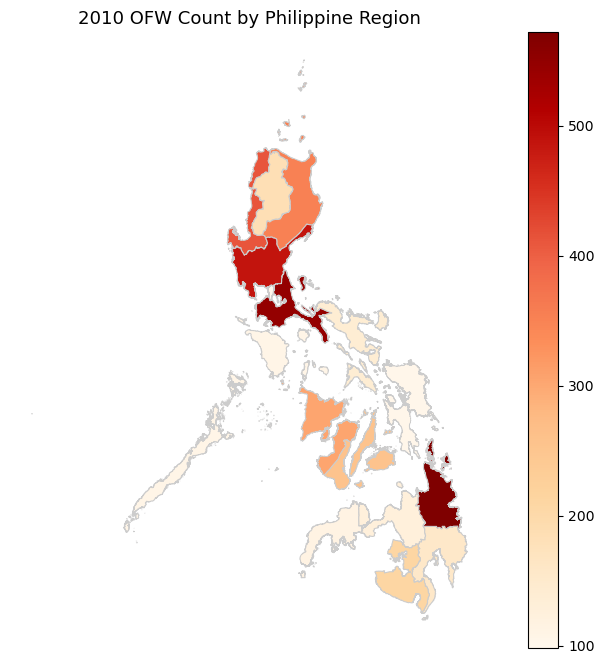

In [580]:
# Creating the chloropleth map for 2010
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2010.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2010 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2010.png", dpi=150)
plt.show()

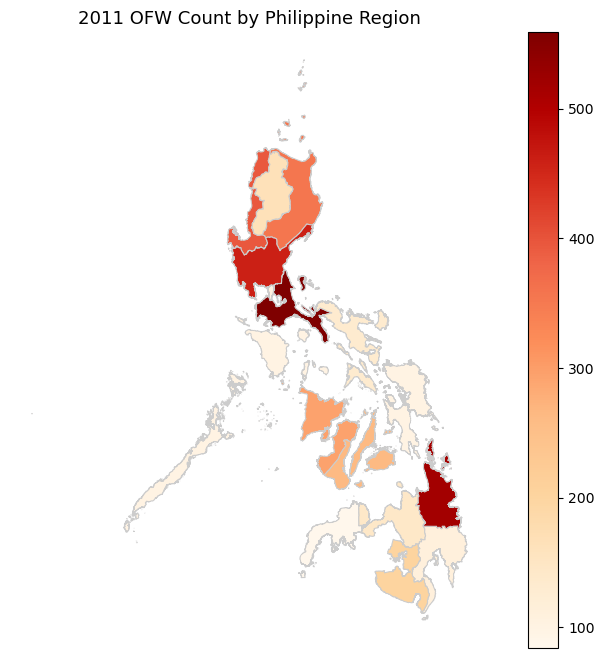

In [581]:
# Creating the chloropleth map for 2011
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2011.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2011 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2011.png", dpi=150)
plt.show()

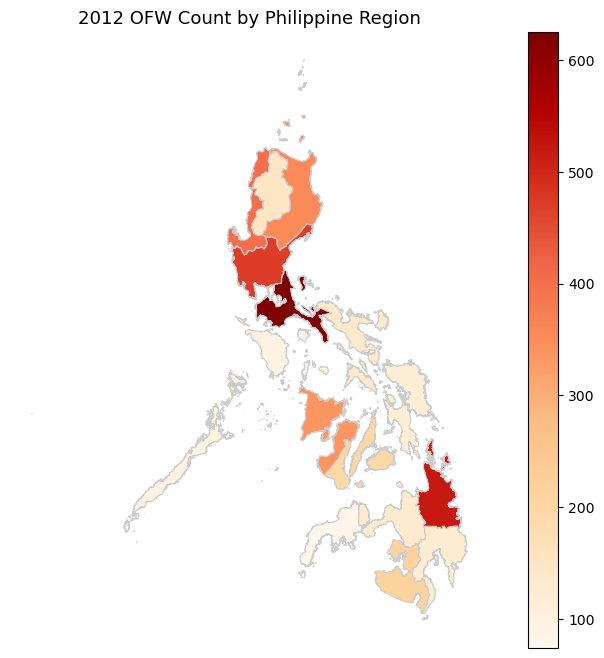

In [582]:
# Creating the chloropleth map for 2012
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2012.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2012 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2012.png", dpi=150)
plt.show()

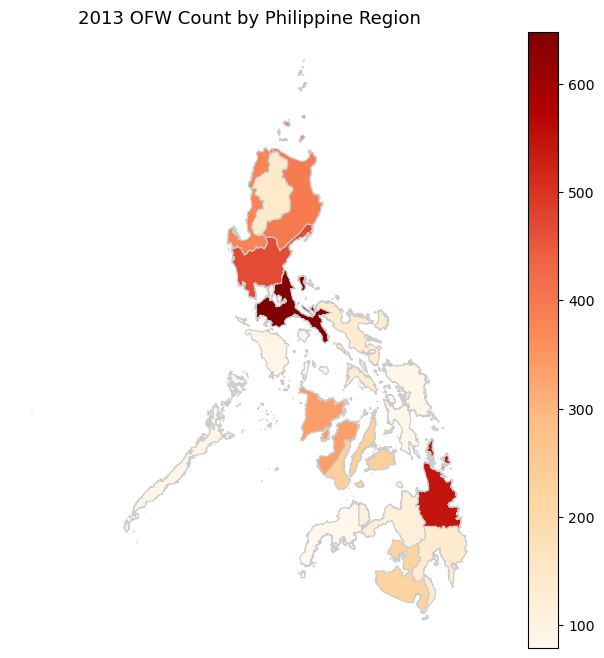

In [583]:
# Creating the chloropleth map for 2013
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2013.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2013 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2013.png", dpi=150)
plt.show()

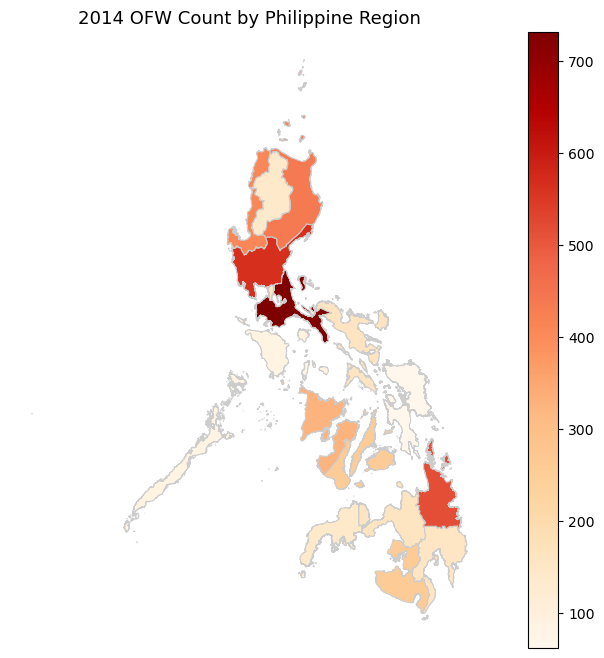

In [584]:
# Creating the chloropleth map for 2014
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2014.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2014 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2014.png", dpi=150)
plt.show()

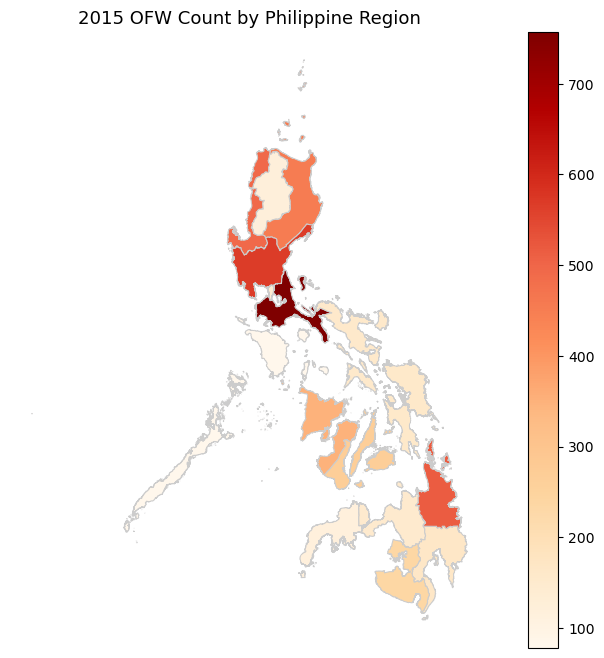

In [585]:
# Creating the chloropleth map for 2015
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2015.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2015 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2015.png", dpi=150)
plt.show()

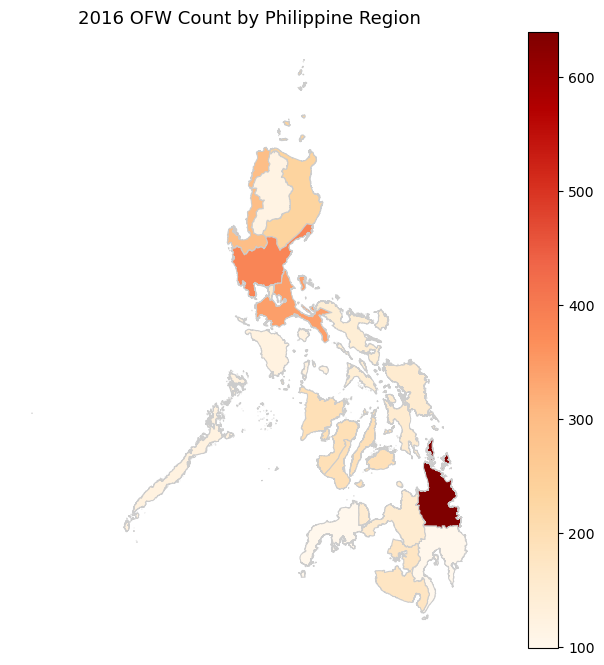

In [586]:
# Creating the chloropleth map for 2016
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2016.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2016 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2016.png", dpi=150)
plt.show()

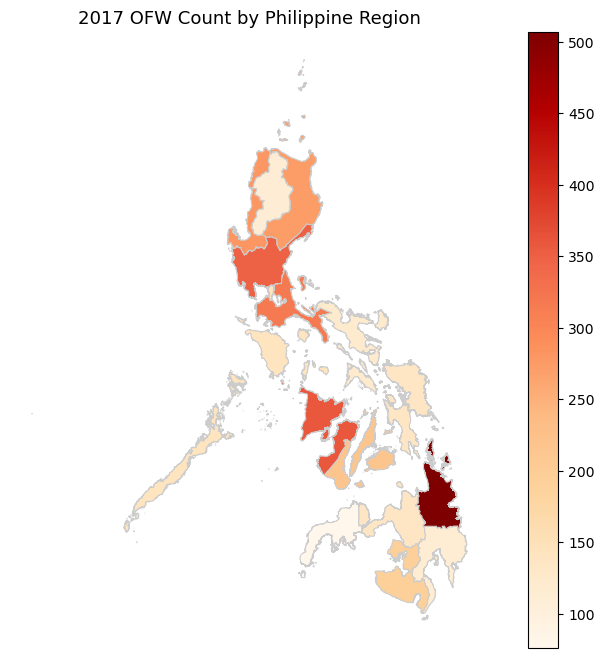

In [587]:
# Creating the chloropleth map for 2017
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2017.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2017 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2017.png", dpi=150)
plt.show()

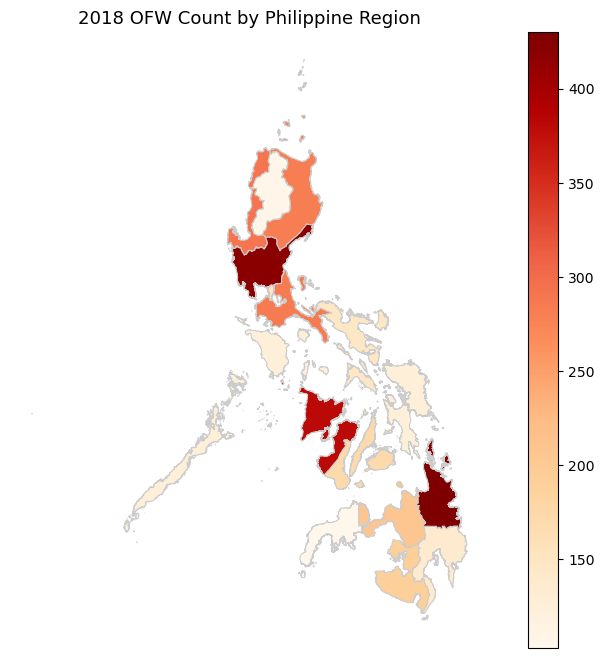

In [588]:
# Creating the chloropleth map for 2018
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2018.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2018 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2018.png", dpi=150)
plt.show()

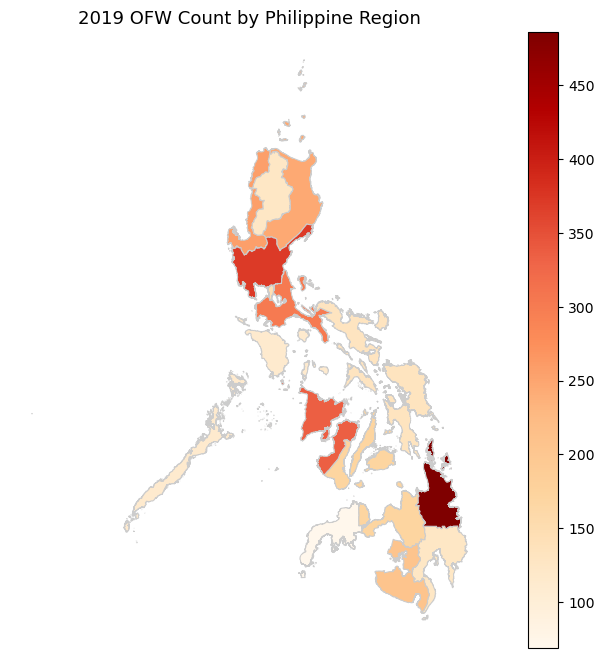

In [589]:
# Creating the chloropleth map for 2019
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2019.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2019 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2019.png", dpi=150)
plt.show()

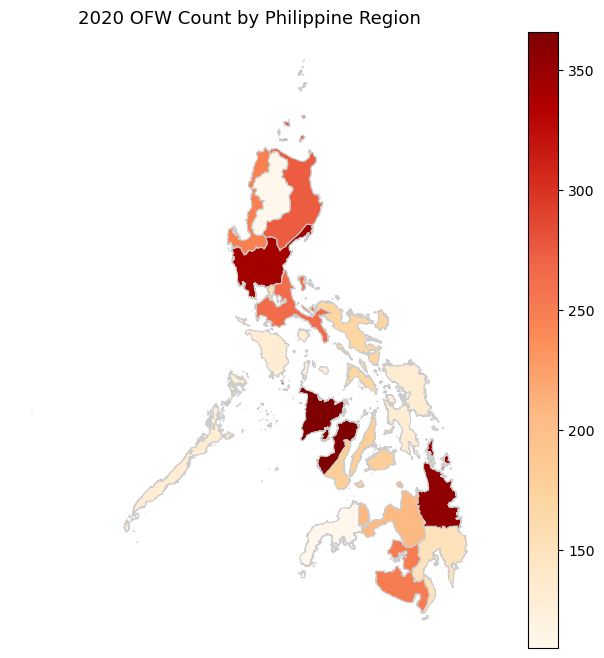

In [590]:
# Creating the chloropleth map for 2020
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2020.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2020 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2020.png", dpi=150)
plt.show()

In [67]:
# Country counts per country
for year in range(2004, 2021):
    df = globals().get(f'df_{year}_filtered')
    if df is not None:
        country_counts = df['CTRY'].value_counts().reset_index()
        country_counts.columns = ['CTRY', 'count']
        globals()[f'country_counts_{year}'] = country_counts

# Merge shapefile with OFW counts per year
for year in range(2004, 2011):
    country_counts = globals().get(f'country_counts_{year}')
    if country_counts is not None:
        df_world_heatmap = world.merge(country_counts, left_on='AREA', right_on='CTRY', how='left')
        globals()[f'df_world_heatmap_{year}'] = df_world_heatmap

for year in range(2011, 2014):
    country_counts = globals().get(f'country_counts_{year}')
    if country_counts is None:
        print(f"country_counts_{year} not found.")
        continue

    df_world_heatmap = world.merge(country_counts, left_on='ADMIN', right_on='CTRY', how='left')
    globals()[f'df_world_heatmap_{year}'] = df_world_heatmap

for year in range(2014, 2021):
    country_counts = globals().get(f'country_counts_{year}')
    if country_counts is None:
        print(f"country_counts_{year} not found.")
        continue

    df_world_heatmap = world.merge(country_counts, left_on='AREA', right_on='CTRY', how='left')
    globals()[f'df_world_heatmap_{year}'] = df_world_heatmap

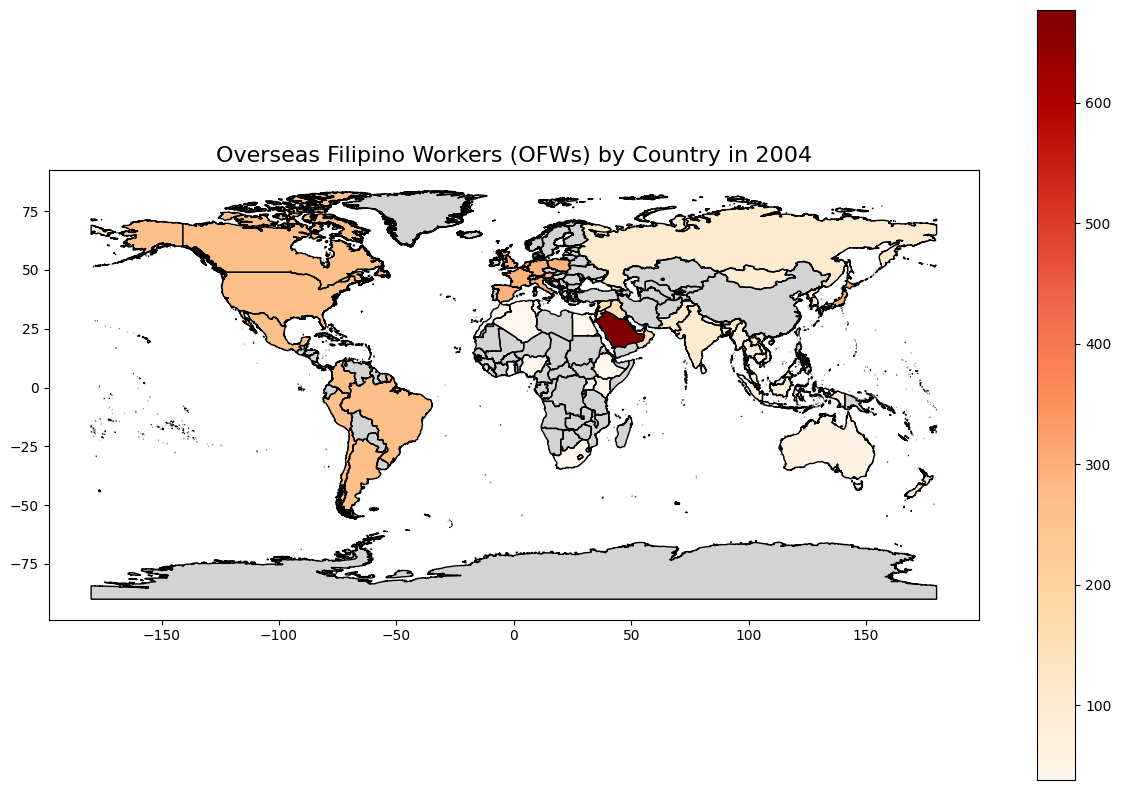

In [68]:
# Creating the cloropleth map for 2004
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2004.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2004.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2004', fontsize=16)
plt.savefig("2004.png", dpi=150)
plt.show()

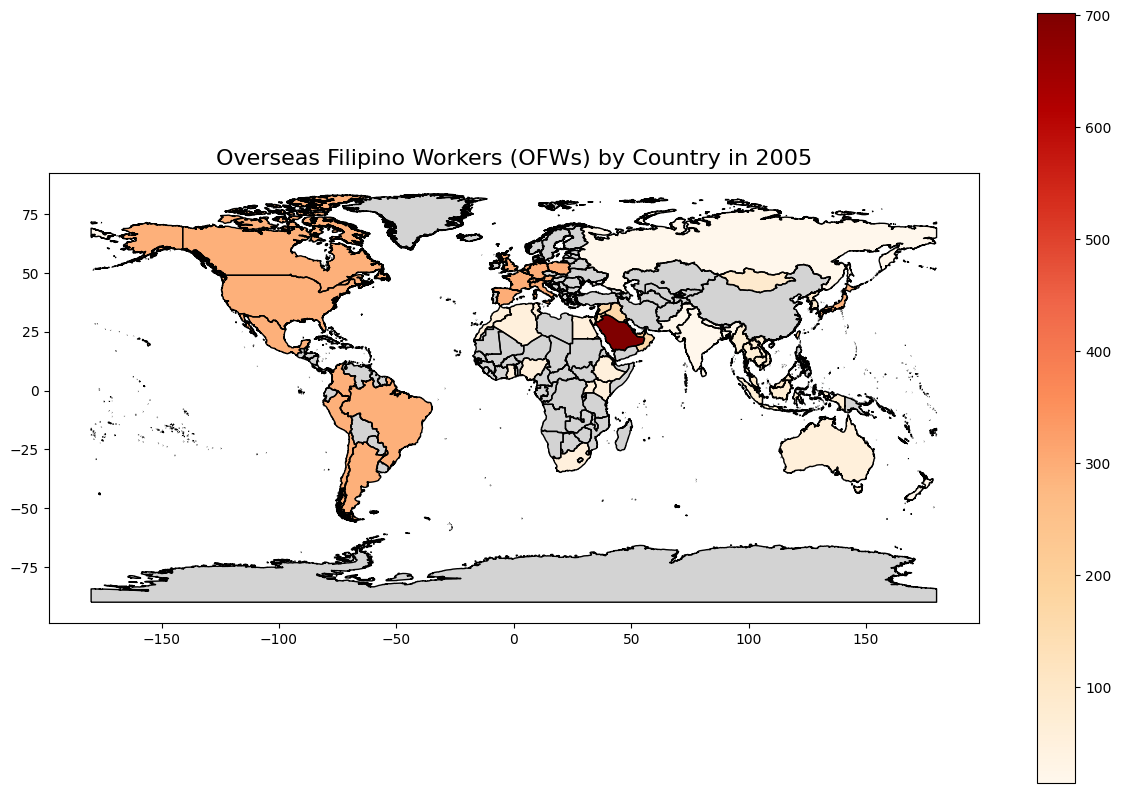

In [69]:
# Creating the cloropleth map for 2005
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2005.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2005.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2005', fontsize=16)
plt.savefig("2005.png", dpi=150)
plt.show()

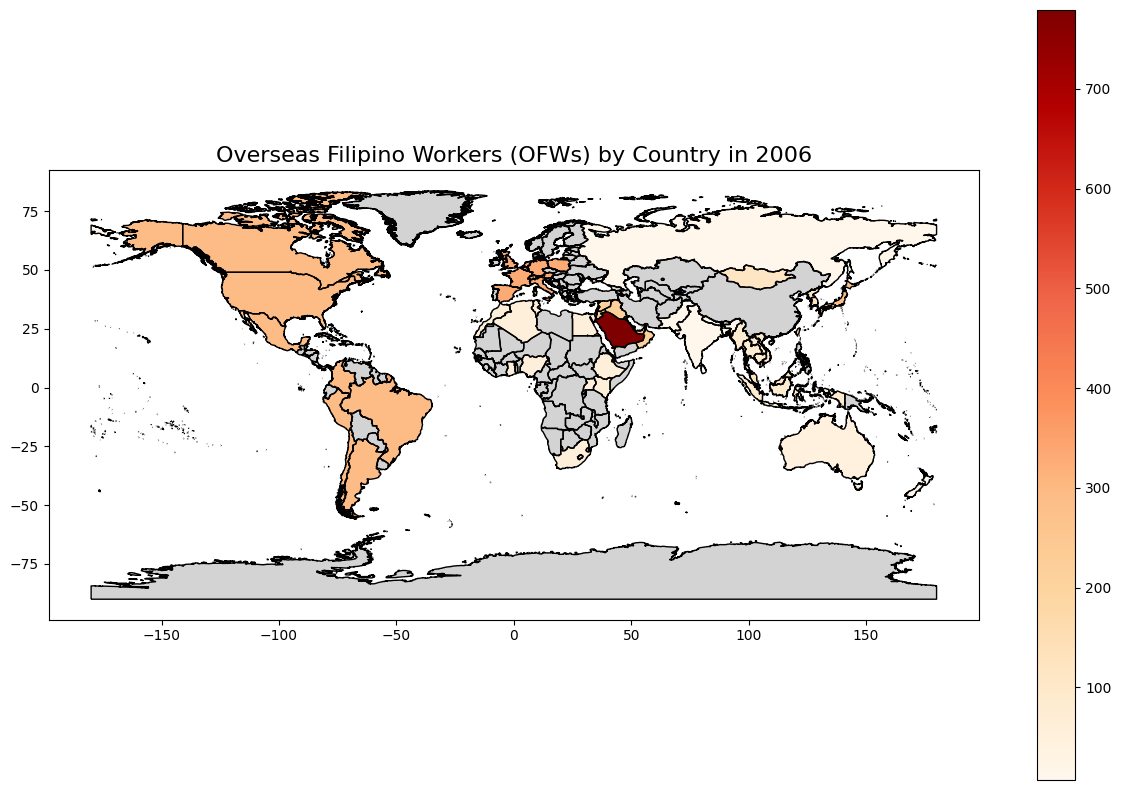

In [70]:
# Creating the cloropleth map for 2006
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2006.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2006.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2006', fontsize=16)
plt.savefig("2006.png", dpi=150)
plt.show()

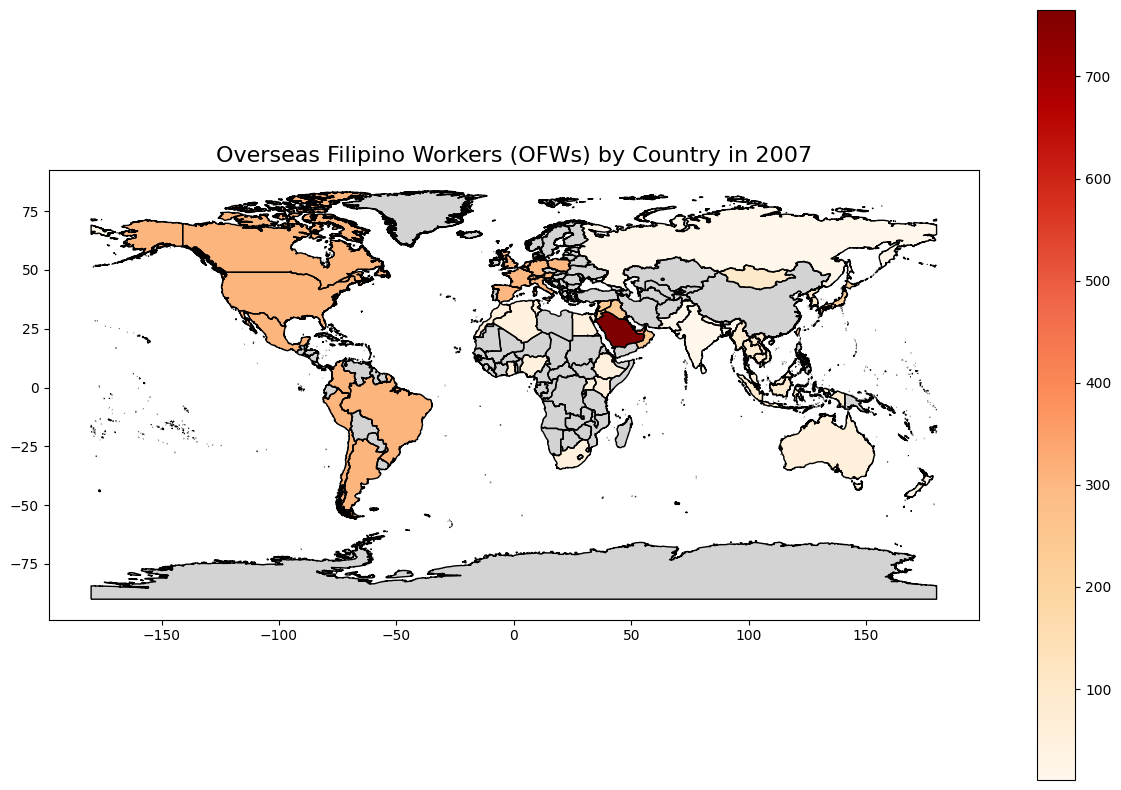

In [71]:
# Creating the cloropleth map for 2007
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2007.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2007.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2007', fontsize=16)
plt.savefig("2007.png", dpi=150)
plt.show()

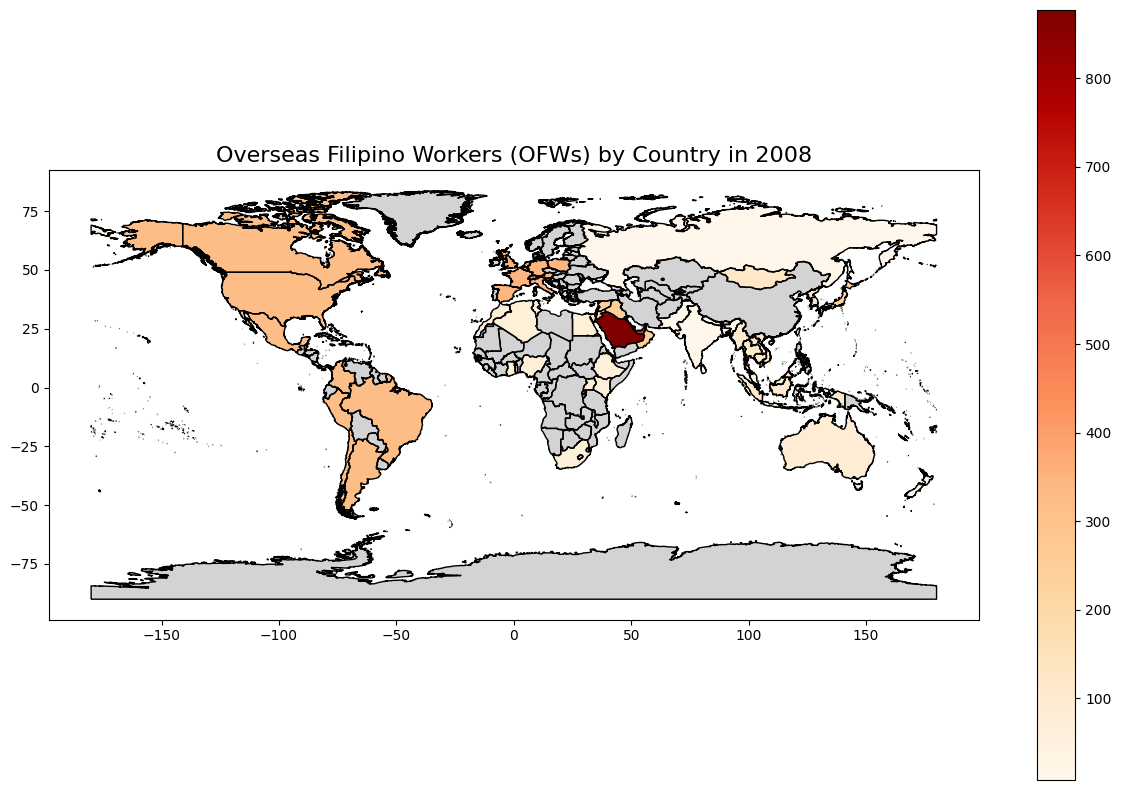

In [72]:
# Creating the cloropleth map for 2008
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2008.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2008.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2008', fontsize=16)
plt.savefig("2008.png", dpi=150)
plt.show()

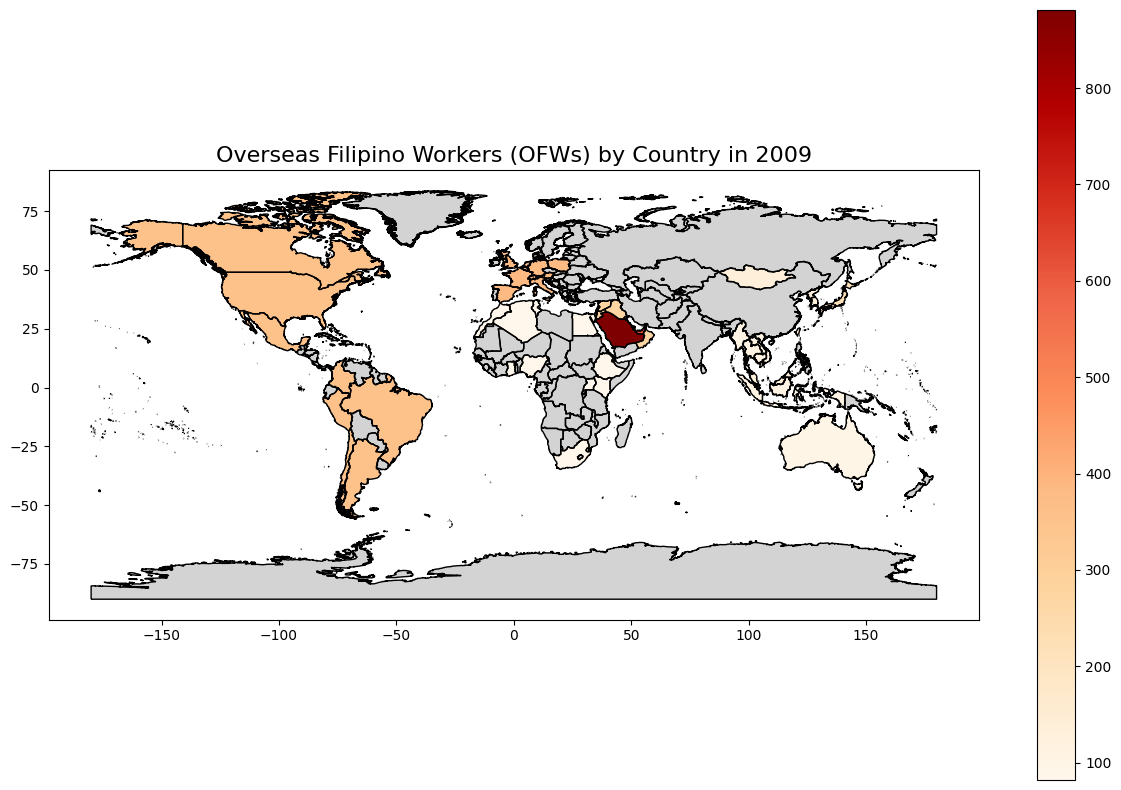

In [73]:
# Creating the cloropleth map for 2009
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2009.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2009.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2009', fontsize=16)
plt.savefig("2009.png", dpi=150)
plt.show()

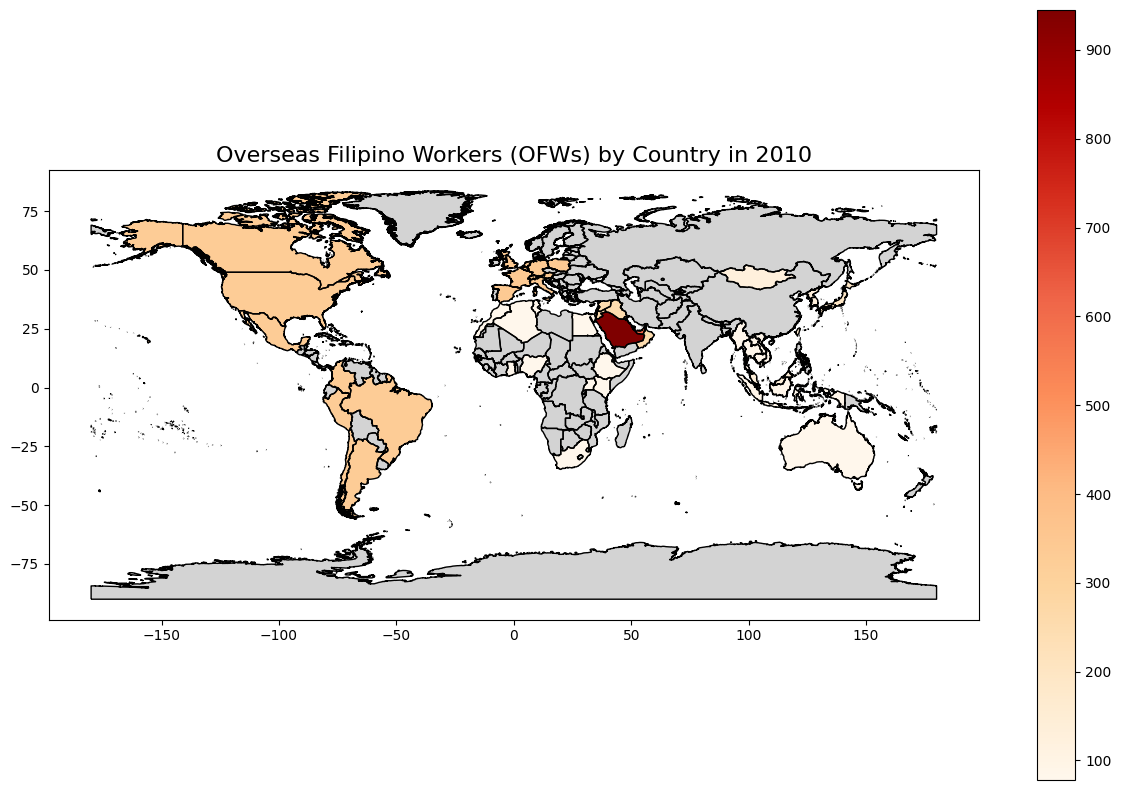

In [74]:
# Creating the cloropleth map for 2010
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2010.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2010.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2010', fontsize=16)
plt.savefig("2010.png", dpi=150)
plt.show()

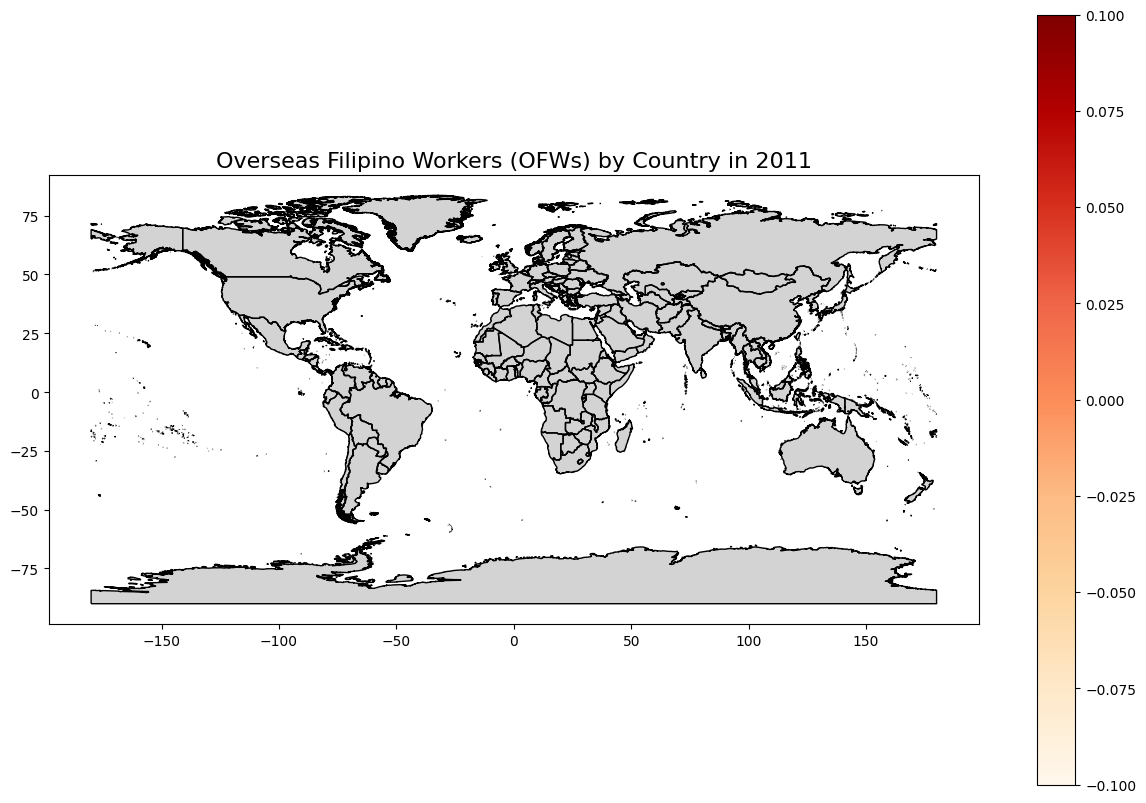

In [75]:
# Creating the cloropleth map for 2011
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2011.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2011.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2011', fontsize=16)
plt.savefig("2011.png", dpi=150)
plt.show()

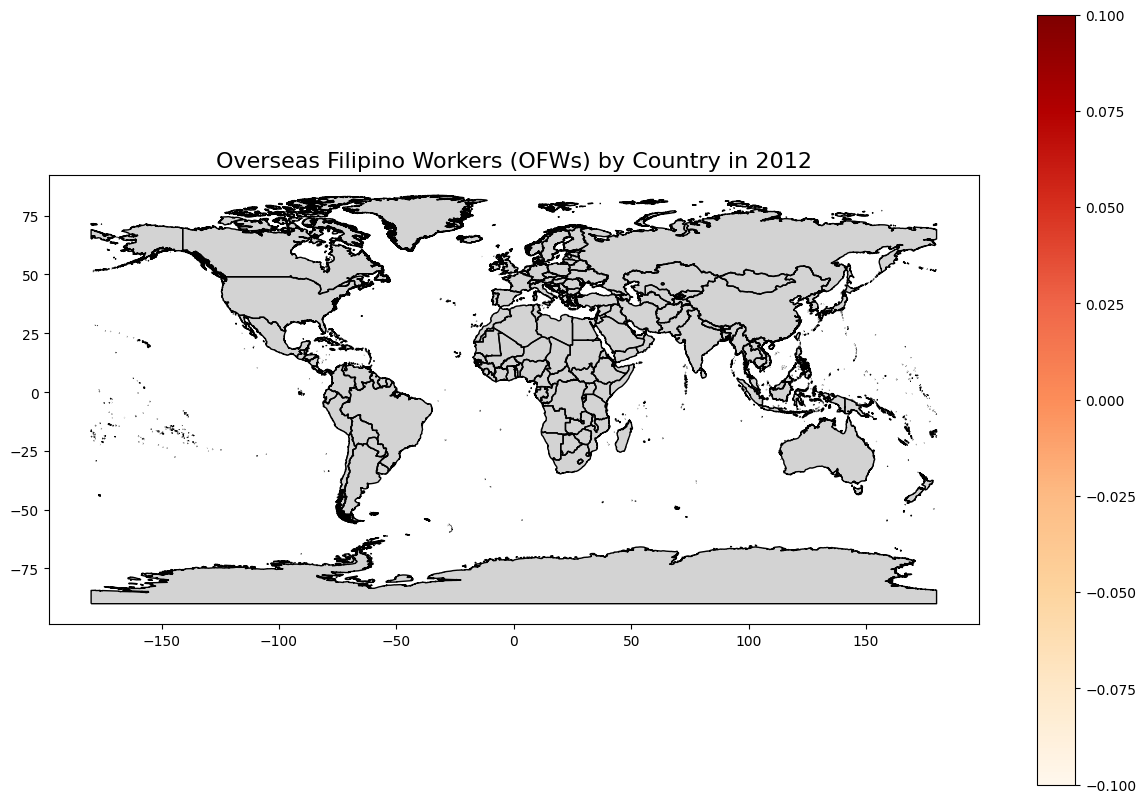

In [76]:
# Creating the cloropleth map for 2012
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2012.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2012.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2012', fontsize=16)
plt.savefig("2012.png", dpi=150)
plt.show()

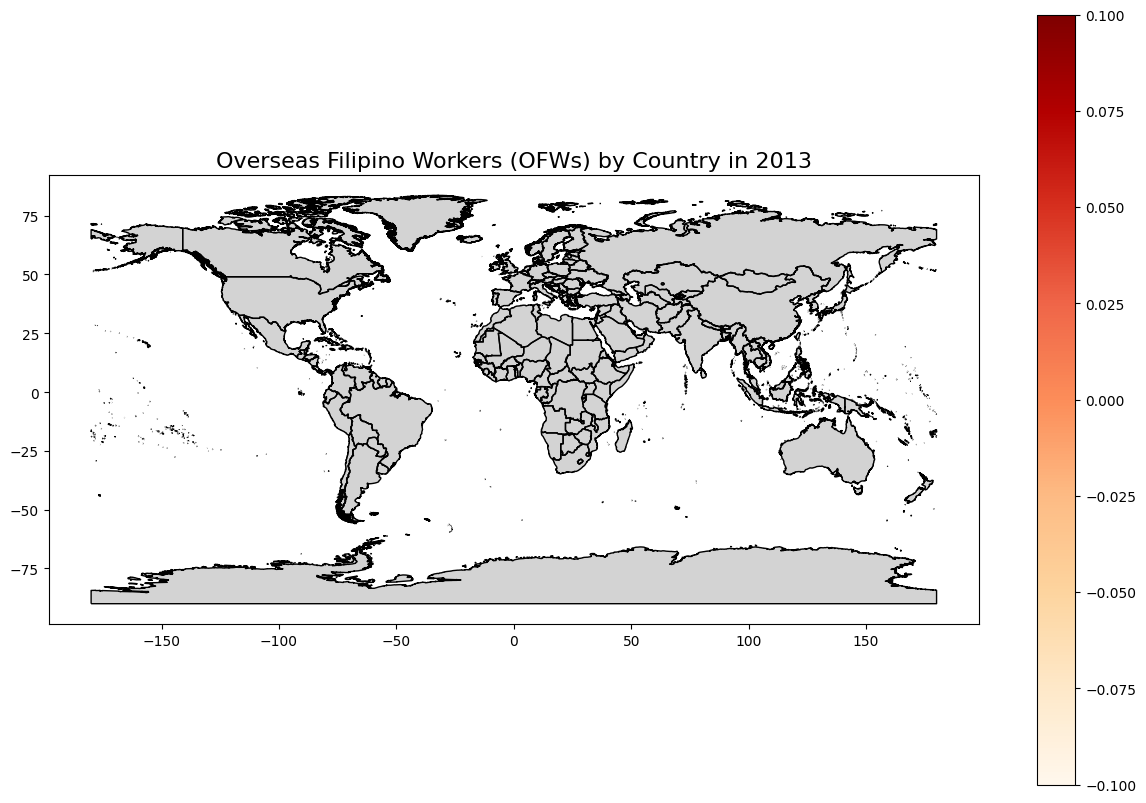

In [77]:
# Creating the cloropleth map for 2013
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2013.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2013.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2013', fontsize=16)
plt.savefig("2013.png", dpi=150)
plt.show()

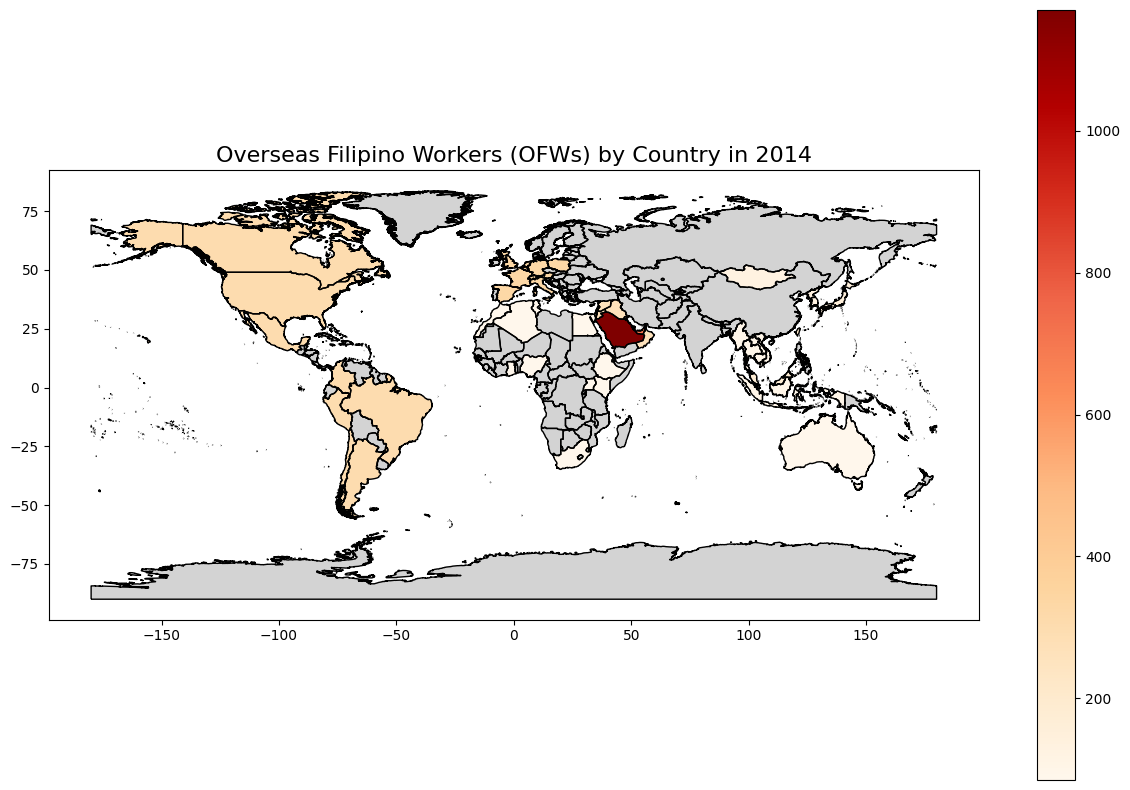

In [78]:
# Creating the cloropleth map for 2014
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2014.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2014.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2014', fontsize=16)
plt.savefig("2014.png", dpi=150)
plt.show()

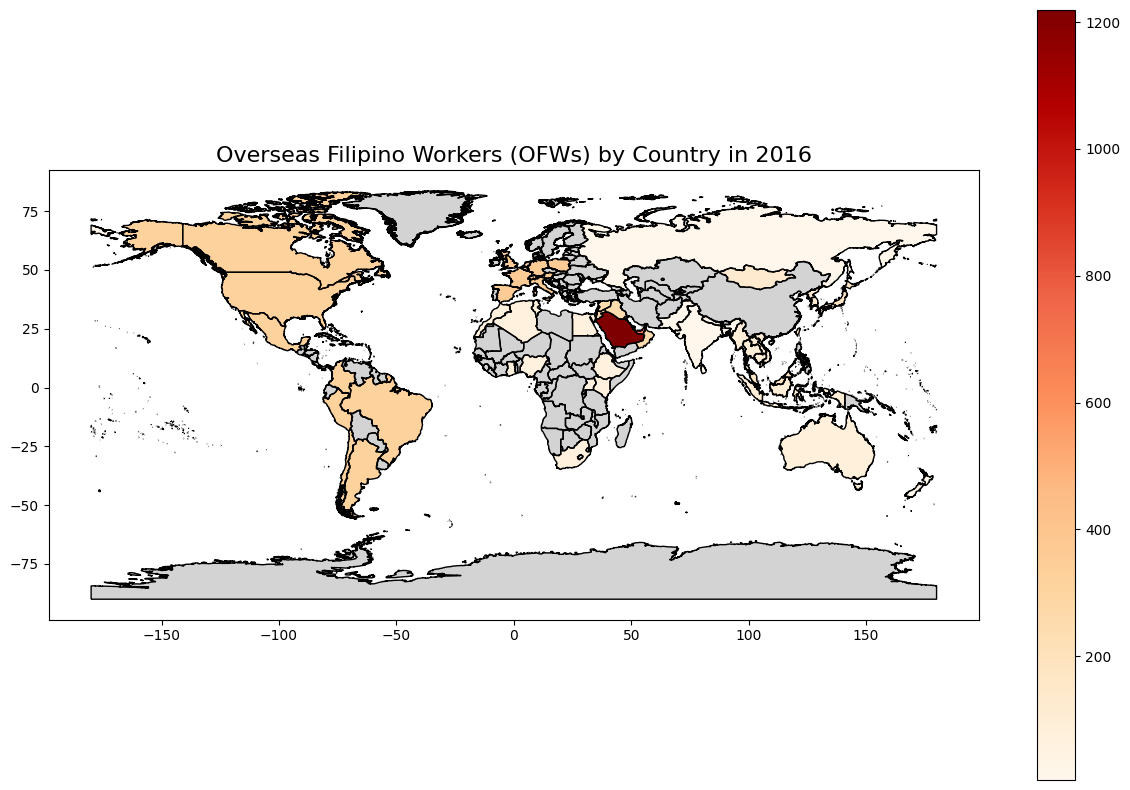

In [79]:
# Creating the cloropleth map for 2015
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2015.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2015.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2016', fontsize=16)
plt.savefig("2016.png", dpi=150)
plt.show()

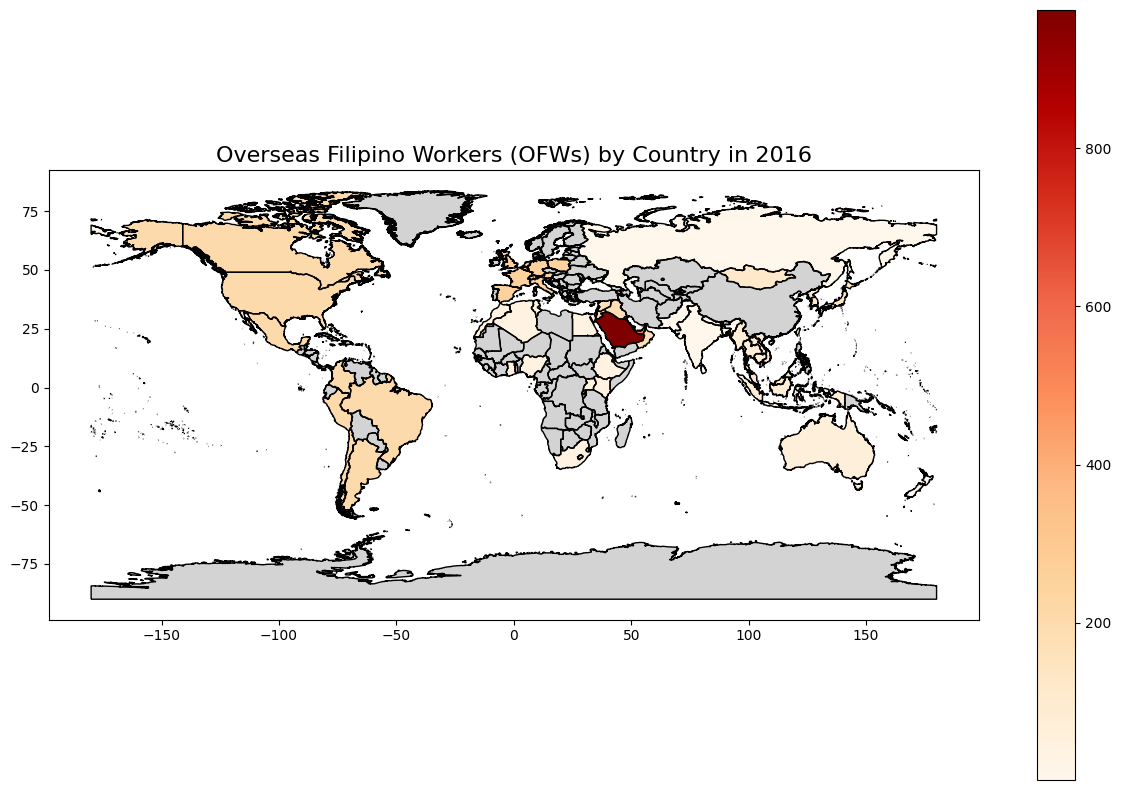

In [80]:
# Creating the cloropleth map for 2016
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2016.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2016.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2016', fontsize=16)
plt.savefig("2016.png", dpi=150)
plt.show()

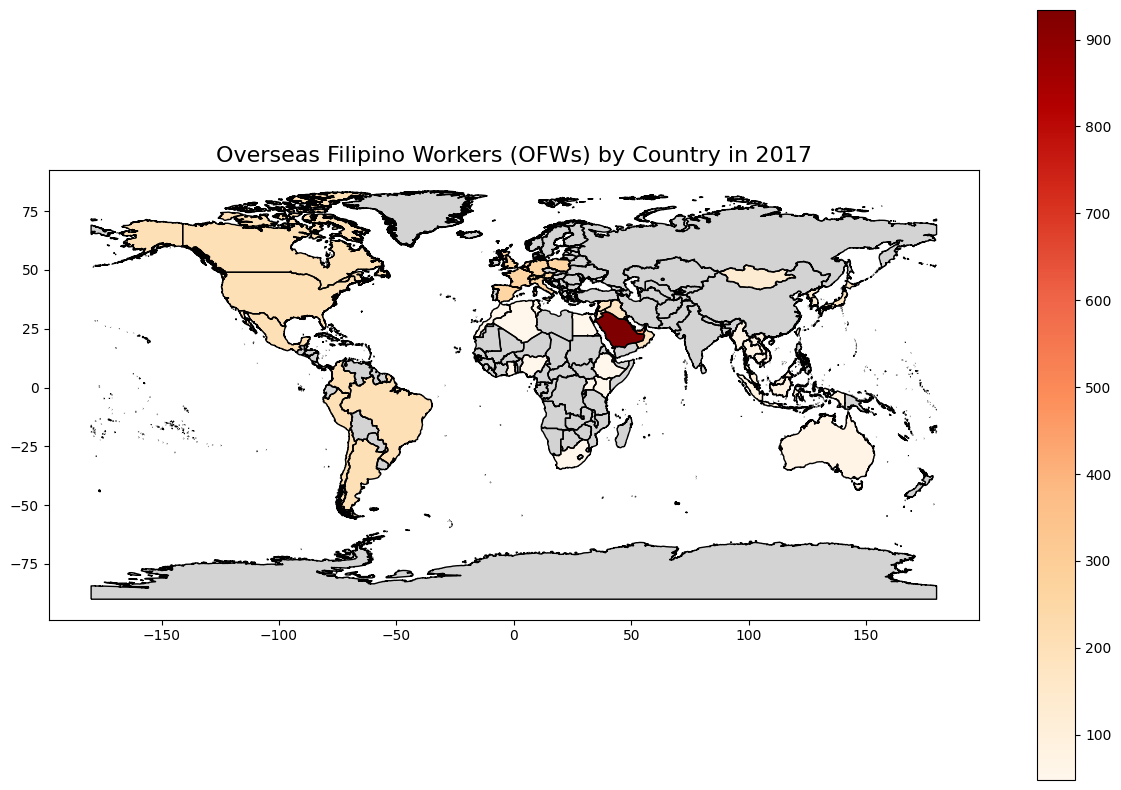

In [81]:
# Creating the cloropleth map for 2017
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2017.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2017.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2017', fontsize=16)
plt.savefig("2017.png", dpi=150)
plt.show()

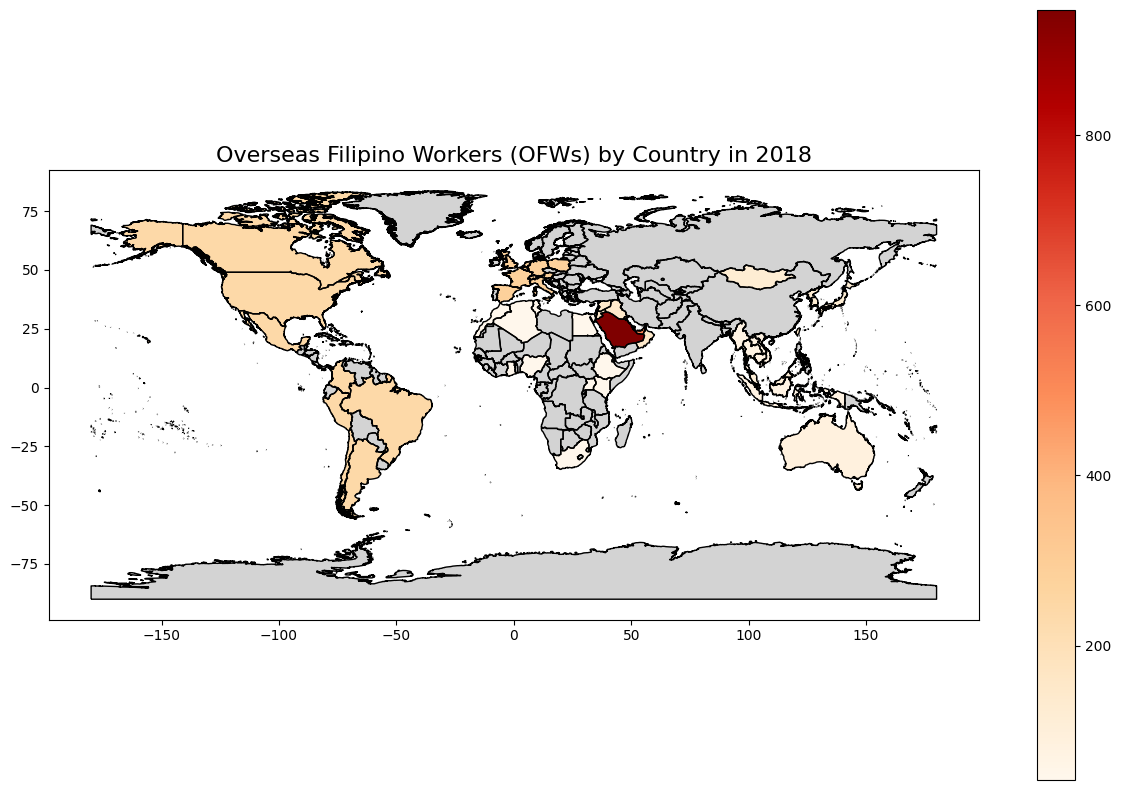

In [82]:
# Creating the cloropleth map for 2018
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2018.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2018.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2018', fontsize=16)
plt.savefig("2018.png", dpi=150)
plt.show()

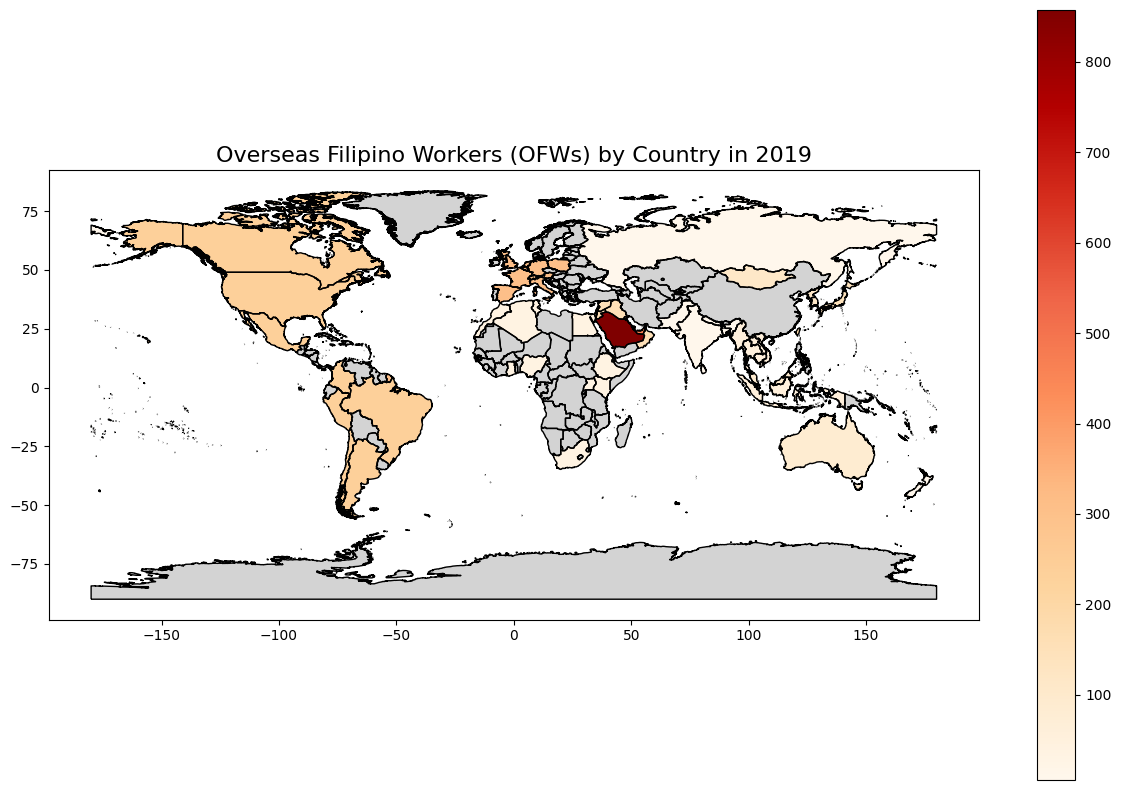

In [83]:
# Creating the cloropleth map for 2019
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2019.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2019.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2019', fontsize=16)
plt.savefig("2019.png", dpi=150)
plt.show()

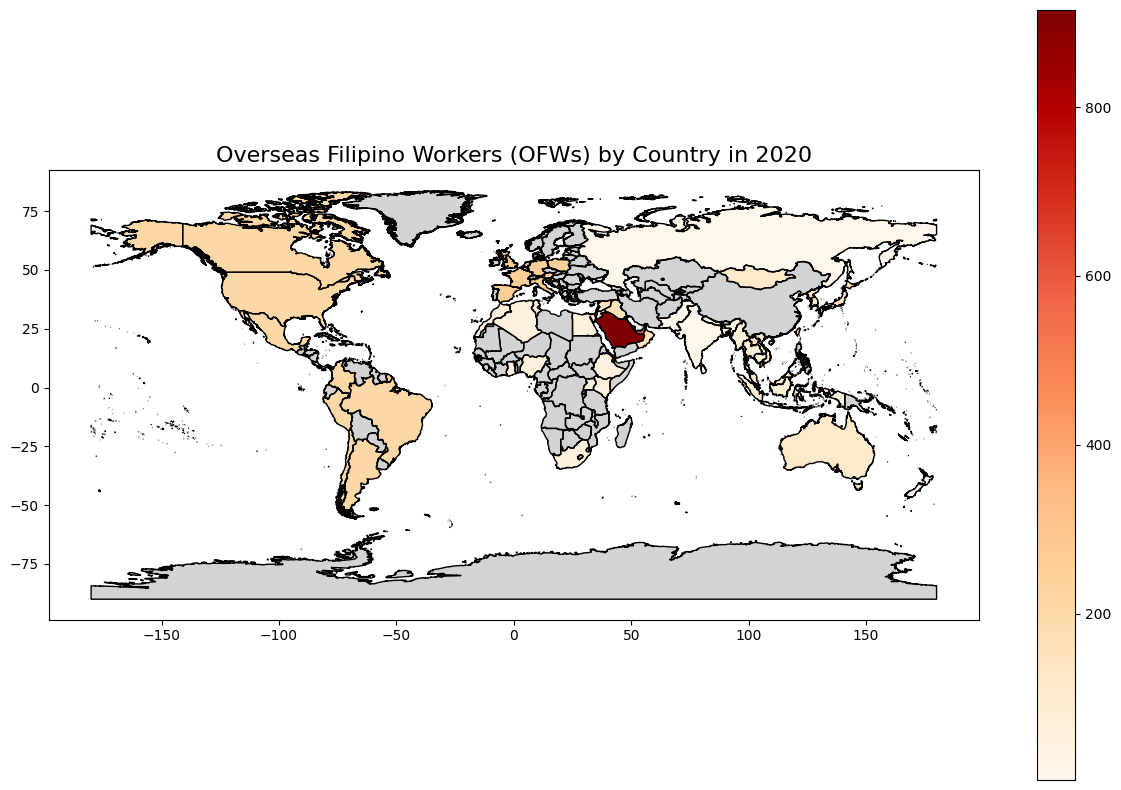

In [84]:
# Creating the cloropleth map for 2020
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world_heatmap_2020.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the boundaries
df_world_heatmap_2020.plot(column='count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Overseas Filipino Workers (OFWs) by Country in 2020', fontsize=16)
plt.savefig("2020.png", dpi=150)
plt.show()

In [95]:
country_counts_2005

CTRY  count
0                      SAUDI ARABIA    702
1                            EUROPE    298
2           NORTH AND SOUTH AMERICA    291
3                             JAPAN    286
4                         HONG KONG    285
5              UNITED ARAB EMIRATES    245
6                            TAIWAN    217
7                         SINGAPORE    186
8   OTHER COUNTRIES IN WESTERN ASIA    163
9                            KUWAIT    138
10                         MALAYSIA     90
11     OTHER COUNTRIES IN EAST ASIA     88
12                            QATAR     79
13  OTHER COUNTRIES IN SE & SC ASIA     70
14                        AUSTRALIA     55
15                           AFRICA     53
16                  OTHER COUNTRIES     14

In [96]:
country_counts_2020

CTRY  count
0                      SAUDI ARABIA    915
1              UNITED ARAB EMIRATES    521
2                         HONG KONG    261
3                            EUROPE    258
4                            KUWAIT    252
5                             QATAR    227
6           NORTH AND SOUTH AMERICA    207
7                         SINGAPORE    202
8                            TAIWAN    155
9   OTHER COUNTRIES IN WESTERN ASIA    146
10                            JAPAN    138
11     OTHER COUNTRIES IN EAST ASIA    110
12                        AUSTRALIA    107
13                         MALAYSIA     86
14  OTHER COUNTRIES IN SE & SC ASIA     68
15                           AFRICA     52
16                  OTHER COUNTRIES      3

# Visualization Overtime

In [ ]:
!pip install imageio
!pip install imageio[ffmpeg]
import imageio
import os

# Set your image directory and output file for Philippine regions
image_folder = 'C:/Users/Shannen Mari/Documents/College/1. School Years/3rd Year/2nd Sem/ECON 138/Datasets/Survey on Overseas Filipinos/Microdata 1995-2023'

output_video = 'ofw_animation.mp4'
fps = 2.0

with imageio.get_writer(output_video, fps=fps) as writer:
    for img in images:
        writer.append_data(img)



IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 1200) to (1504, 1200) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [ ]:
from IPython.display import Video
Video("ofw_animation.mp4", embed=True, width=600, height=500)

# Limited to 2003-2020 because Mimaropa and Calabarzon only became separate regions in 2002. 

In [90]:
import imageio
import os

# Set your image directory and output file for countries
image_folder = 'C:/Users/Ariana Espiritu/Desktop/UP/A.Y. 2024-2025/2nd Sem/Econ 138 Python/Final Project'
output_video = 'ofw_world_animation.mp4'
fps = 2.0

# Get all PNG images in the folder, sorted by filename
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
image_files.sort()

with imageio.get_writer(output_video, fps=fps) as writer:
    for filename in image_files:
        img_path = os.path.join(image_folder, filename)
        img = imageio.imread(img_path)
        writer.append_data(img)

C:\Users\Ariana Espiritu\AppData\Local\Temp\ipykernel_20688\883112593.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2250, 1500) to (2256, 1504) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [91]:
from IPython.display import Video
Video("ofw_world_animation.mp4", embed=True, width=600, height=500)
